# Business Problem: Capacity Planning for Future Growth
**Business Problem** 
Some corridors or time periods experience consistently high demand or overcrowding issues, leading to suboptimal service quality and customer satisfaction. The public transportation system needs to anticipate and accommodate future increases in passenger demand to ensure adequate capacity and service quality. 

Goals:

- **Identify High-Demand Corridors** 
Identify corridors and time periods with consistently high levels of demand or overcrowding based on historical data analysis. 
- **Forecast Future Demand**  
Develop accurate forecasts of passenger demand for different corridors and time periods based on historical data analysis.  
- **Plan for Capacity Expansion**  
Identify corridors and time periods with projected increases in demand and plan for capacity expansion accordingly, including the addition of new routes, vehicles, or infrastructure.
- **Enhance Customer Satisfaction**  
Improve the overall customer experience by reducing overcrowding, minimizing wait times, and ensuring reliable and comfortable service. 
- **Enhance Scalability**  
Develop scalable solutions that can adapt to changing demand patterns and accommodate future growth without sacrificing service quality or efficiency.   

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm

pd.set_option('display.max_columns', None)

In [2]:
dfraw = pd.read_csv("Transjakarta.csv")
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

# Data Exploration and Cleaning

In [3]:
dfraw.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [4]:
# Check duplicated rows
dfraw.duplicated().sum()

0

In [5]:
# Standardize Data Format

dfraw['payCardBank'] = dfraw['payCardBank'].str.upper()
dfraw['payCardBank'] = dfraw['payCardBank'].replace('EMONEY', 'E-MONEY')
dfraw['payCardBank'].unique()

array(['E-MONEY', 'DKI', 'FLAZZ', 'ONLINE', 'BRIZZI', 'BNI'], dtype=object)

In [6]:
# View number of missing values
null_cols = dfraw.columns[dfraw.isnull().any()]
df_null = dfraw[null_cols].isnull().sum().to_frame().reset_index()
df_null.columns = ['Feature', 'Counts']
df_null['Percentage(%)'] = round(df_null['Counts']/len(dfraw) * 100, 3)
df_null

,Feature,Counts,Percentage(%)
0,corridorID,1257,3.317
1,corridorName,1930,5.092
2,tapInStops,1213,3.201
3,tapOutStops,2289,6.040
4,tapOutStopsName,1344,3.546
5,tapOutStopsLat,1344,3.546
6,tapOutStopsLon,1344,3.546
7,stopEndSeq,1344,3.546
8,tapOutTime,1344,3.546
9,payAmount,1007,2.657


In [7]:
dfraw['transID'].nunique()

37900

`transID` will be used to count the as a distinct value for aggregation.

### Checking Coridor ID and Coridor Name

In [8]:
# Checking null values in corridor ID
dfraw.loc[dfraw['corridorID'].isna() == True,['corridorID','corridorName']]

,corridorID,corridorName
7,NaN,NaN
120,NaN,NaN
240,NaN,NaN
250,NaN,NaN
257,NaN,NaN
...,...,...
37689,NaN,NaN
37727,NaN,NaN
37770,NaN,NaN
37797,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang


In [9]:
# Checking null values in corridor name
dfraw.loc[dfraw['corridorName'].isna() == True,['corridorID','corridorName']]

,corridorID,corridorName
7,NaN,NaN
38,5M,NaN
39,2,NaN
60,T21,NaN
61,12A,NaN
...,...,...
37792,S31,NaN
37815,JAK.56,NaN
37824,S21,NaN
37838,NaN,NaN


In [10]:
# Checking the corridor name with no corridor ID
dfraw.loc[(dfraw['corridorID'].isna() == True)&(dfraw['corridorName'].isna() == False),['corridorID','corridorName']].head()

,corridorID,corridorName
438,NaN,Rusun Waduk Pluit - Penjaringan
895,NaN,Tanah Abang - Kebayoran Lama
1410,NaN,Sunter Boulevard Barat - Penjaringan
1723,NaN,Pulo Gebang - Pulo Gadung 2 via PIK
2423,NaN,Kampung Melayu - Pulo Gebang via BKT


In [11]:
# Checking if there any relation for corridor ID to its corresponding name
dfraw.loc[(dfraw['corridorName']== 'Rusun Waduk Pluit - Penjaringan'),['corridorID','corridorName']].value_counts()

corridorID  corridorName                   
12C         Rusun Waduk Pluit - Penjaringan    131
dtype: int64

In [12]:
dfraw.loc[(dfraw['corridorName']== 'Tanah Abang - Kebayoran Lama'),['corridorID','corridorName']].value_counts()

corridorID  corridorName                
JAK.11      Tanah Abang - Kebayoran Lama    282
dtype: int64

In [13]:
dfraw.loc[(dfraw['corridorName']== 'Sunter Boulevard Barat - Penjaringan'),['corridorID','corridorName']].value_counts()

corridorID  corridorName                        
M12         Sunter Boulevard Barat - Penjaringan    95
dtype: int64

From the result above, we can see that the null value in corridor ID can have the name of the corridor and vice versa. We can check the corridor name and fill the missing values.

***Deep Analysis***

In [14]:
# Checking the corridor ID and its corridor name
corridorID_name = dfraw.loc[:,['corridorID','corridorName']].dropna().groupby(['corridorID','corridorName']).value_counts().reset_index().drop_duplicates()
corridorID_name

,corridorID,corridorName,0
0,1,Blok M - Kota,230
1,10,Tanjung Priok - PGC 2,97
2,10A,Rusun Marunda - Tanjung Priok,142
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang,137
4,10D,Kampung Rambutan - Tanjung Priok,164
...,...,...,...
216,S21,Ciputat - CSW,383
217,S22,Ciputat - Kampung Rambutan,133
218,S31,Bintaro - Fatmawati,146
219,T11,Poris Plawad - Bundaran Senayan,256


In [15]:
# Checking if there are any same values of corridor name
corridorID_name[corridorID_name['corridorName'].duplicated(keep=False)]

,corridorID,corridorName,0
0,1,Blok M - Kota,230
41,2,Pulo Gadung - Monas,279
49,3,Kalideres - Bundaran HI via Veteran,127
62,5,Matraman Baru - Ancol,246
98,9,Pinang Ranti - Pluit,59
198,M1,Blok M - Kota,61
204,M2,Pulo Gadung - Monas,60
205,M3,Kalideres - Bundaran HI via Veteran,204
207,M5,Matraman Baru - Ancol,15
212,M9,Pinang Ranti - Pluit,149


We've found that some corridor name applied to 2 corridor ID. Before fill in the missing values, first we can group into only one value.

In [16]:
dfclean = dfraw.copy()

In [17]:
# Assign the same value into one

corridorName_to_corridorID = corridorID_name.drop_duplicates('corridorName').set_index('corridorName')['corridorID'].to_dict()
dfclean['corridorID'] = dfclean['corridorName'].map(corridorName_to_corridorID)

In [18]:
# Re-checking the values
dfclean.loc[(dfclean['corridorName']== 'Blok M - Kota'),['corridorID','corridorName']].value_counts()

corridorID  corridorName 
1           Blok M - Kota    291
dtype: int64

In [19]:
# Re-checking the values
dfclean.loc[(dfclean['corridorID']== 'M2'),['corridorID','corridorName']].value_counts()

Series([], dtype: int64)

All the duplicated values has been assigned to only one unique values.

### Handling Missing Values in Corridor ID

In [20]:
corridor_name_to_id = dfraw.set_index('corridorName')['corridorID'].to_dict()

# Fill NaN values in corridorID based on the corridorName mapping
dfclean['corridorID'] = dfclean.apply(
    lambda row: corridor_name_to_id[row['corridorName']] if pd.isna(row['corridorID']) else row['corridorID'],
    axis=1
)

In [21]:
dfclean['corridorID'].isna().sum()

0

### Handling Missing Values in Corridor Name

In [22]:
for index in range(len(dfclean)):
    if type(dfclean.loc[index,'corridorName'])!= type(np.NAN):
        continue
    if type(dfclean.loc[index,'corridorID']) == type(np.NAN):
        continue
    dfclean.loc[index,'corridorName'] = dfraw.loc[dfraw['corridorID']==dfclean.loc[index,'corridorID'],'corridorName'].reset_index(drop=True)[0]

In [23]:
dfclean['corridorName'].isna().sum()

0

In [24]:
tes = dfclean.loc[:,['corridorID','corridorName']].dropna().groupby(['corridorID','corridorName']).value_counts().reset_index().drop_duplicates()
tes

,corridorID,corridorName,0
0,1,Blok M - Kota,291
1,10,Tanjung Priok - PGC 2,97
2,10A,Rusun Marunda - Tanjung Priok,143
3,10B,Rusun Cipinang Besar Selatan - Penas Kalimalang,138
4,10D,Kampung Rambutan - Tanjung Priok,166
...,...,...,...
211,S21,Ciputat - CSW,383
212,S22,Ciputat - Kampung Rambutan,133
213,S31,Bintaro - Fatmawati,146
214,T11,Poris Plawad - Bundaran Senayan,256


In [25]:
# Checking if there are any same values of corridor name
tes[tes['corridorName'].duplicated(keep=False)]

,corridorID,corridorName,0


***Corridor ID and Corridor Name has been handled succesfully!***

### Checking tapInStops and tapInStopsName  

We can do the same thing for `tapInStops` and `tapInStopsName` as we did before for `corridorID` and `corridorName`.  

In [26]:
# Checking null values in tapInStops
dfclean['tapInStops'].isna().sum()

1213

In [27]:
# Checking null values in tapInStops but with value in tapInStopsName
dfclean.loc[dfclean['tapInStops'].isna() == True,['tapInStops','tapInStopsName']]

,tapInStops,tapInStopsName
21,NaN,Lippo Mall Kramat Jati
41,NaN,Jln. BB Utara
101,NaN,Jln. H. Terin Pangkalan Jati
122,NaN,Wisma Asia II
163,NaN,Wolter Monginsidi
...,...,...
37775,NaN,Sbr. Gg. Langgar Kelapa Dua
37816,NaN,Cipinang Lontar Rusun Polri
37822,NaN,Menara Cardig
37855,NaN,Kel. Balekambang


In [28]:
dfclean.loc[dfclean['tapInStopsName']=='Lippo Mall Kramat Jati',['tapInStops','tapInStopsName']].head(5)

,tapInStops,tapInStopsName
21,NaN,Lippo Mall Kramat Jati
621,B02144P,Lippo Mall Kramat Jati
1221,B02144P,Lippo Mall Kramat Jati
1821,B02144P,Lippo Mall Kramat Jati
2421,B02144P,Lippo Mall Kramat Jati


From the results above, it seems like the null value in `tapInStops` actually have its name based on `tapInStopsName`. So we can do the same treatment as before since `tapInStops` have correlation with `tapInStopsName`.

In [29]:
# Checking the tapInStops and its name-Create dataframe
tapInstops_name = dfclean.loc[:,['tapInStops','tapInStopsName']].dropna().groupby(['tapInStops','tapInStopsName']).value_counts().reset_index().drop_duplicates()
tapInstops_name

,tapInStops,tapInStopsName,0
0,B00001P,18 Office Park,19
1,B00004P,ACC Simatupang,1
2,B00005P,ACE Hardware,6
3,B00008P,Adam Malik 1,1
4,B00017P,Akper Fatmawati Pondok Labu,3
...,...,...,...
2565,P00294,Sawah Besar Arah Selatan,20
2566,P00295,Mangga Besar Arah Utara,23
2567,P00296,Mangga Besar Arah Selatan,3
2568,P00297,BNN LRT,151


***Deep Analysis***

In [30]:
# Checking if there are any same values of tapInStopsName
tapInstops_name[tapInstops_name['tapInStopsName'].duplicated(keep=False)]

,tapInStops,tapInStopsName,0
2359,P00052,Dukuh Atas 2,20
2569,P00298,Dukuh Atas 2,1


In [31]:
dfclean[dfclean['tapInStopsName'] == 'Dukuh Atas 2']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
12466,YQZR386J1X76PZ,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-03 08:04:03,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-03 08:51:25,3500.0
13466,MDKU383Q9M74FS,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-04 08:08:41,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-04 10:07:57,3500.0
14466,AQNW655P6W94PI,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,3B,Rusun Flamboyan - Cengkareng,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-05 08:32:25,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-05 09:05:42,3500.0
15466,GRBH066C3K26TE,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-06 08:50:56,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-06 10:36:37,3500.0
16466,PTWX505M7Q47XV,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-07 09:25:53,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-07 09:50:44,3500.0
17466,MHUM533H9N50OV,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-10 08:19:14,NaN,TU Gas,-6.192410,106.90489,14.0,2023-04-10 09:45:06,3500.0
18466,EHIT887E5A67HI,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-11 07:21:18,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-11 09:05:40,3500.0
19466,HVKJ261U1U78AG,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-12 08:41:46,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-12 09:04:10,3500.0
20466,PYOG880C4A77KX,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-13 08:46:28,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-13 10:29:33,3500.0
21466,CEHN700I3L62FS,639048791417,FLAZZ,"Gantar Namaga, S.Sos",F,1989,4,Pulo Gadung 2 - Tosari,1.0,P00052,Dukuh Atas 2,-6.203276,106.823770,0,2023-04-14 08:54:31,P00263,TU Gas,-6.192410,106.90489,14.0,2023-04-14 09:34:36,3500.0


We created the dataframe that contains the pairing of `tapInStops` (tap in ID) and its corresponding name `tapInStopsName` named tapInStops_name dataframe. We also checked if there's any duplicated unique value and we found it, "Dukuh Atas 2" that has 2 `tapInStopS`. From 21 rows, only 1 row has P00298 for Dukuh Atas 2, the latitude and longitude coordinates also different from other Dukuh Atas. Because only 1 row, we can delete this row to reduce noise.  

In [32]:
# Remove rows where tapInStops is P00298
dfclean = dfclean[dfclean['tapInStops'] != 'P00298']

In [33]:
# Let's check the total unique value since we checked only for nan or corresponding name
print('Number of unique values in cleaned dataframe: ',dfclean['tapInStopsName'].nunique())
print('Number of unique values in selected dataframe: ',tapInstops_name['tapInStopsName'].nunique())

Number of unique values in cleaned dataframe:  2602
Number of unique values in selected dataframe:  2569


Let me explain these numbers. The cleaned dataframe has 2602 unique value of `tapInStops`, the selected dataframe is the dataframe containing the pairing of `tapInStops` and its corresponding name, The difference number between them is the number of unique value of `tapInStopsName` but has no `tapInStops`.

In [34]:
# Find unique values in dfclean
unique_tapInStops_dfclean = set(dfclean['tapInStopsName'].unique())

# Find unique values in selected DataFrame
unique_tapInStops_selected = set(tapInstops_name['tapInStopsName'].unique())

# Find the difference
unique_in_dfclean_not_in_selected = unique_tapInStops_dfclean.difference(unique_tapInStops_selected)
print("There are ", len(unique_in_dfclean_not_in_selected), "unique value haven't mentioned in selected dataframe-pairing tapInStops")
unique_in_dfclean_not_in_selected

There are  33 unique value haven't mentioned in selected dataframe-pairing tapInStops


{'Bundaran Alam Sutera 1',
 'Cipinang',
 'Cipinang Lontar Rusun Polri',
 'Fatmawati 1',
 'Galur',
 'Gg. Al Mawaddah Tengah',
 'Graha Sindu Bpk Penabur',
 'Green Lake City',
 'Jln. Pinang 1',
 'Jln. Veteran 2',
 'Kec. Pondok Gede',
 'Kel. Balekambang',
 'Klinik Sasana Husada',
 'Menara Cardig',
 'Nifarro Park',
 'PPKD Jaktim',
 'Ponpes Baitul Quran Al Ikhwan 1',
 'Pusdiklat Pajak Jln. Sakti IV',
 'Rusun Pulo Gebang',
 'Rusun Rorotan 2',
 'Sbr. Barito Park',
 'Sbr. Gg. Langgar Kelapa Dua',
 'Sbr. Jln. R. Anggun',
 'Sbr. Jln. Rawabadung',
 'Sbr. Klinik Yadika Petukangan',
 'Sbr. Koko Semesta',
 'Sbr. Ruko Taman Cemara',
 'Sbr. SMAN 41',
 'Sbr. STIE Rawamangun',
 'Simpang Jln. Kramat Jaya 2',
 'Simpang Otista III Selatan',
 'Sisma Medikal',
 'Term. Muara Angke 2'}

In [35]:
# Let's check those values

dfclean[dfclean['tapInStopsName'].isin(unique_in_dfclean_not_in_selected)]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32155,YWRK695S6M25WV,346031371330778,E-MONEY,Putri Wibowo,F,1982,7P,Pondok Kelapa - BKN,0.0,NaN,PPKD Jaktim,-6.247777,106.942360,6,2023-04-08 18:01:36,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
32262,MAVS929E2U67DY,5530470482508325,DKI,Jamalia Lestari,F,2003,11C,Rusun Pinus Elok - Rusun Pulo Gebang,1.0,NaN,Rusun Pulo Gebang,-6.201478,106.949750,0,2023-04-09 08:35:23,NaN,NaN,NaN,NaN,NaN,NaN,0.0
32365,GFXI432F3W42KE,342872650777880,E-MONEY,Carla Maryati,F,2006,S11,BSD - Jelambar,0.0,NaN,Bundaran Alam Sutera 1,-6.244107,106.648890,16,2023-04-09 19:53:59,B02990P,Pratama Abadi,-6.233124,106.642560,19.0,2023-04-09 20:17:31,3500.0
32533,SJEG609E5A77VR,3511593949794788,DKI,Humaira Maryadi,F,1992,12B,Pluit - Senen,1.0,NaN,Graha Sindu Bpk Penabur,-6.159971,106.835090,8,2023-04-09 18:46:36,B00122P,Baywalk 2,-6.110359,106.779610,41.0,2023-04-09 19:36:31,3500.0
32572,OHMY262Z9S32VK,3531560183774236,DKI,Kiandra Nashiruddin,M,1993,JAK.58,Cilincing - Rorotan,1.0,NaN,Rusun Rorotan 2,-6.149932,106.954780,0,2023-04-08 06:45:49,B05328P,SMKN Jasalena Marunda,-6.127384,106.956690,24.0,2023-04-08 07:10:38,0.0
32663,DKJP886D8B30GD,4225751347437323699,BRIZZI,Hj. Dewi Firmansyah,M,1978,JAK.115,Term. Tj. Priok - Pegangsaan II IGI,0.0,NaN,Jln. Pinang 1,-6.114470,106.903190,7,2023-04-09 21:44:28,B00381P,Gading Nirwana,-6.148645,106.912950,28.0,2023-04-09 22:42:32,0.0
32768,AMRU195J1Q27AC,3582791887979981,DKI,Tgk. Keisha Hutasoit,M,1973,6T,Pasar Minggu - Velbak,0.0,NaN,Fatmawati 1,-6.292571,106.797430,18,2023-04-16 07:07:32,B04808P,Simpang Gandaria Kyai Maja,-6.241860,106.790000,39.0,2023-04-16 07:48:30,3500.0
32821,NXEZ755U4U05XV,4310011077804361,DKI,Baktiono Hartati,F,1954,9H,Blok M - Universitas Indonesia,1.0,NaN,Nifarro Park,-6.263007,106.843320,20,2023-04-15 06:30:46,B02277P,Masjid At Taqwa 1,-6.276957,106.845870,25.0,2023-04-15 07:22:54,3500.0
32852,WQEY067N5P53RZ,371996902605484,E-MONEY,Yuliana Hakim,M,2001,JAK.05,Semper - Rorotan,1.0,NaN,Ponpes Baitul Quran Al Ikhwan 1,-6.128812,106.964910,33,2023-04-16 20:38:07,B02439P,MI Arruhaniyah Rorotan,-6.135438,106.967440,34.0,2023-04-16 22:18:38,0.0
32861,BHHH076Q0C57JF,6582441579700211,DKI,Dartono Halim,F,1983,JAK.56,Grogol - Srengseng,1.0,NaN,Sbr. Jln. R. Anggun,-6.161055,106.769920,51,2023-04-16 07:59:17,B05704P,Term. Grogol,-6.166565,106.790250,57.0,2023-04-16 09:35:19,0.0


In [36]:
# Let's deep dive

dfclean[dfclean['tapInStopsName'] == 'PPKD Jaktim']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32155,YWRK695S6M25WV,346031371330778,E-MONEY,Putri Wibowo,F,1982,7P,Pondok Kelapa - BKN,0.0,NaN,PPKD Jaktim,-6.247777,106.94236,6,2023-04-08 18:01:36,NaN,NaN,NaN,NaN,NaN,NaN,3500.0


In [37]:
dfclean[dfclean['tapInStopsName'] == 'Rusun Pulo Gebang']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32262,MAVS929E2U67DY,5530470482508325,DKI,Jamalia Lestari,F,2003,11C,Rusun Pinus Elok - Rusun Pulo Gebang,1.0,NaN,Rusun Pulo Gebang,-6.201478,106.94975,0,2023-04-09 08:35:23,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Each unique value that haven't been mentioned are the list of `tapInStopsName` that have no `tapInStops` ID, so we can't fill this since each value also have one row. So, we can delete rows that contain these unique values. 

### Handle Missing Values in TapInStops

In [38]:
# Hanlde missing values in tapInStops based on its corresponding name
mappingTapInStops = dfclean.dropna(subset='tapInStops').drop_duplicates('tapInStopsName')
mappingTapInStops = mappingTapInStops.set_index('tapInStopsName')['tapInStops'].to_dict()

dfclean['tapInStops'] = dfclean['tapInStops'].fillna(dfclean['tapInStopsName'].map(mappingTapInStops))

In [39]:
dfclean['tapInStops'].isna().sum()

34

In [40]:
dfclean[dfclean['tapInStops'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32155,YWRK695S6M25WV,346031371330778,E-MONEY,Putri Wibowo,F,1982,7P,Pondok Kelapa - BKN,0.0,NaN,PPKD Jaktim,-6.247777,106.942360,6,2023-04-08 18:01:36,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
32262,MAVS929E2U67DY,5530470482508325,DKI,Jamalia Lestari,F,2003,11C,Rusun Pinus Elok - Rusun Pulo Gebang,1.0,NaN,Rusun Pulo Gebang,-6.201478,106.949750,0,2023-04-09 08:35:23,NaN,NaN,NaN,NaN,NaN,NaN,0.0
32365,GFXI432F3W42KE,342872650777880,E-MONEY,Carla Maryati,F,2006,S11,BSD - Jelambar,0.0,NaN,Bundaran Alam Sutera 1,-6.244107,106.648890,16,2023-04-09 19:53:59,B02990P,Pratama Abadi,-6.233124,106.642560,19.0,2023-04-09 20:17:31,3500.0
32533,SJEG609E5A77VR,3511593949794788,DKI,Humaira Maryadi,F,1992,12B,Pluit - Senen,1.0,NaN,Graha Sindu Bpk Penabur,-6.159971,106.835090,8,2023-04-09 18:46:36,B00122P,Baywalk 2,-6.110359,106.779610,41.0,2023-04-09 19:36:31,3500.0
32572,OHMY262Z9S32VK,3531560183774236,DKI,Kiandra Nashiruddin,M,1993,JAK.58,Cilincing - Rorotan,1.0,NaN,Rusun Rorotan 2,-6.149932,106.954780,0,2023-04-08 06:45:49,B05328P,SMKN Jasalena Marunda,-6.127384,106.956690,24.0,2023-04-08 07:10:38,0.0
32663,DKJP886D8B30GD,4225751347437323699,BRIZZI,Hj. Dewi Firmansyah,M,1978,JAK.115,Term. Tj. Priok - Pegangsaan II IGI,0.0,NaN,Jln. Pinang 1,-6.114470,106.903190,7,2023-04-09 21:44:28,B00381P,Gading Nirwana,-6.148645,106.912950,28.0,2023-04-09 22:42:32,0.0
32768,AMRU195J1Q27AC,3582791887979981,DKI,Tgk. Keisha Hutasoit,M,1973,6T,Pasar Minggu - Velbak,0.0,NaN,Fatmawati 1,-6.292571,106.797430,18,2023-04-16 07:07:32,B04808P,Simpang Gandaria Kyai Maja,-6.241860,106.790000,39.0,2023-04-16 07:48:30,3500.0
32821,NXEZ755U4U05XV,4310011077804361,DKI,Baktiono Hartati,F,1954,9H,Blok M - Universitas Indonesia,1.0,NaN,Nifarro Park,-6.263007,106.843320,20,2023-04-15 06:30:46,B02277P,Masjid At Taqwa 1,-6.276957,106.845870,25.0,2023-04-15 07:22:54,3500.0
32852,WQEY067N5P53RZ,371996902605484,E-MONEY,Yuliana Hakim,M,2001,JAK.05,Semper - Rorotan,1.0,NaN,Ponpes Baitul Quran Al Ikhwan 1,-6.128812,106.964910,33,2023-04-16 20:38:07,B02439P,MI Arruhaniyah Rorotan,-6.135438,106.967440,34.0,2023-04-16 22:18:38,0.0
32861,BHHH076Q0C57JF,6582441579700211,DKI,Dartono Halim,F,1983,JAK.56,Grogol - Srengseng,1.0,NaN,Sbr. Jln. R. Anggun,-6.161055,106.769920,51,2023-04-16 07:59:17,B05704P,Term. Grogol,-6.166565,106.790250,57.0,2023-04-16 09:35:19,0.0


Based on the results above, we previously saw that 33 `tapInStopsName` unique values weren't mentioned in the original dataset. After we checked those values, each unique value has 1 row, except the corridor name "Semper - Rorotan" which has 2 values which makes the total rows that haven't mentioned 34 rows or data.  Furthermore, we filled in the missing value by mapping the `tapInStopsName` to `tapInStops` but the Nan values that can't be filled because we don't have the data are 34 rows as well and have the same rows with the unmentioned data before. This means that the null values are in the same rows. We can't use these data for trip/route analysis, but we can still use it for passengers or transaction analysis. However, to make the comparison of data sizes fair, we can remove these rows because they are only small compared to the total of the entire dataset.

In [41]:
# Remove rows with NaN values in 'tapInStops'
dfclean = dfclean.dropna(subset=['tapInStops'])
dfclean['tapInStops'].isna().sum()

0

***TapInStops has been handled succesfully!***

### Checking tapOutStops and tapOutStopsName

In [42]:
dfclean['tapOutStops'].isna().sum()

2286

In [43]:
dfclean['tapOutStopsName'].isna().sum()

1342

In [44]:
# Checking null values in tapOutStops 
dfclean.loc[dfclean['tapOutStops'].isna() == True,['tapOutStops','tapOutStopsName']]

,tapOutStops,tapOutStopsName
6,NaN,NaN
30,NaN,NaN
70,NaN,NaN
89,NaN,Walikota Jakarta Timur
130,NaN,NaN
...,...,...
37796,NaN,NaN
37799,NaN,NaN
37878,NaN,FX Sudirman
37887,NaN,Pramuka LIA


We may see that some missing values in `tapOutStops` have no name in `tapOutStopsName`, but have name in other rows. Now, let's see the proportion of these data.

In [45]:
# Total null values in tapOutStops
print("The total null values in tapOutStops is : ", dfclean['tapOutStops'].isna().sum())
print("The total null values in tapOutStopsName is : ", dfclean['tapOutStopsName'].isna().sum())

# Count the number of rows with tapOutStops that have name
tapout_null_name_notnull = dfclean[dfclean['tapOutStops'].isna() & dfclean['tapOutStopsName'].notna()]
total_tapout_null_name_notnull = tapout_null_name_notnull.shape[0]
print("The total null values in tapOutStops that have tapOutStopsName is : ", total_tapout_null_name_notnull)

# Count the number of rows with tapOutStops that have no name
null_tapout_stops_rows = dfclean[(dfclean['tapOutStops'].isna()) & (dfclean['tapOutStopsName'].isna())]
total_null_tapout_stops_rows = null_tapout_stops_rows.shape[0]
print("The total null values in tapOutStops that have no tapOutStopsName is : ", total_null_tapout_stops_rows)

The total null values in tapOutStops is :  2286
The total null values in tapOutStopsName is :  1342
The total null values in tapOutStops that have tapOutStopsName is :  944
The total null values in tapOutStops that have no tapOutStopsName is :  1342


In [46]:
# Checking the tapOutStops and its name
tapOutstops_name = dfclean.loc[:,['tapOutStops','tapOutStopsName']].dropna().groupby(['tapOutStops','tapOutStopsName']).value_counts().reset_index().drop_duplicates()
tapOutstops_name

,tapOutStops,tapOutStopsName,0
0,B00002P,ABA,2
1,B00003P,Acacia Residence,1
2,B00004P,ACC Simatupang,1
3,B00005P,ACE Hardware,1
4,B00013P,Ahmad Yani Pisangan Baru,1
...,...,...,...
2211,P00293,Sawah Besar Arah Utara,1
2212,P00294,Sawah Besar Arah Selatan,22
2213,P00295,Mangga Besar Arah Utara,8
2214,P00297,BNN LRT,107


In [47]:
dfclean.loc[dfclean['tapOutStopsName']=='ABA',['tapOutStops','tapOutStopsName']].head(5)

,tapOutStops,tapOutStopsName
32867,B00002P,ABA
33896,B00002P,ABA


From the data, the total null values in `tapOutStops` is 2286 where 944 of it have their name and 1342 have no name, which are the same count of null values in `tapOutStopsName`. After we checked for an example, it seems that the `tapOutStops` and `tapOutStopsName` have the correlation where the ID of `tapOutStops` have their name as mentioned in `tapOutStopsName`, just like `corridorID` and `tapInStops`. 
Now let's check if there are duplicated values.

***Deep Analysis***

In [48]:
# Checking if there are any same values of tapOutStopsName
tapOutstops_name[tapOutstops_name['tapOutStopsName'].duplicated(keep=False)]

,tapOutStops,tapOutStopsName,0
2019,P00052,Dukuh Atas 2,28
2215,P00298,Dukuh Atas 2,20


In [49]:
dfclean[dfclean['tapOutStopsName'] == 'Dukuh Atas 2']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
176,KAGY982E0G63WU,6542837703080439,DKI,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-03 06:32:33,P00052,Dukuh Atas 2,-6.203276,106.823770,15.0,2023-04-03 07:20:23,3500.0
776,VYCP933N4D90DE,6542837703080439,DKI,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-04 05:08:52,P00052,Dukuh Atas 2,-6.203276,106.823770,15.0,2023-04-04 05:36:22,3500.0
1376,GYUF829J4P49DH,6542837703080439,DKI,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-05 05:02:44,P00052,Dukuh Atas 2,-6.203276,106.823770,15.0,2023-04-05 05:30:35,3500.0
1976,WNJZ321W6X93GD,6542837703080439,DKI,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-06 06:56:57,NaN,Dukuh Atas 2,-6.203276,106.823770,15.0,2023-04-06 07:54:09,3500.0
2576,GJEE297W6K37EZ,6542837703080439,DKI,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-07 05:22:09,P00052,Dukuh Atas 2,-6.203276,106.823770,15.0,2023-04-07 05:55:26,3500.0
3176,PHGI772L6Q50TU,6542837703080439,DKI,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-10 06:45:49,P00052,Dukuh Atas 2,-6.203276,106.823770,15.0,2023-04-10 07:12:08,3500.0
3776,YUOT647A2Z19XF,6542837703080439,DKI,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-11 05:45:08,P00052,Dukuh Atas 2,-6.203276,106.823770,15.0,2023-04-11 06:30:58,3500.0
4376,CMDK510J9B76KG,6542837703080439,DKI,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-12 06:23:24,P00052,Dukuh Atas 2,-6.203276,106.823770,15.0,2023-04-12 07:21:24,3500.0
4976,TSML556X5W26WJ,6542837703080439,DKI,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-13 06:14:04,P00052,Dukuh Atas 2,-6.203276,106.823770,15.0,2023-04-13 06:37:22,3500.0
5576,VPXC161P5W80JK,6542837703080439,DKI,Aurora Nasyiah,M,1991,M4,Pulo Gadung 2 - Dukuh Atas 2,1.0,P00269,Velodrome,-6.193468,106.88830,5,2023-04-14 06:46:07,P00052,Dukuh Atas 2,-6.203276,106.823770,15.0,2023-04-14 07:15:58,3500.0


It seems "that Dukuh Atas 2" has 2 `tapOutStops` (P00052 and P00298). It doesn't seem fair to change the `tapOutStop` to another value since the latitude and longitude differ. However, because the `tapInStop` P00298 has been removed before, it's quite fair to remove the `tapOutStops` P00298 as well, where we can delete the tap ID P00298 for both tapIn and tapOut as we assume there's no tap ID P00298. 
Another finding is there are NaN values of Dukuh Atas 2.

In [50]:
# Remove rows where tapOutStops is P00298
dfclean = dfclean[dfclean['tapOutStops'] != 'P00298']

In [51]:
# Let's check the total unique value since we checked only for nan or corresponding name
print('Number of unique values tapOutStops in cleaned dataframe: ',dfclean['tapOutStopsName'].nunique())
print('Number of unique values tapOutStops in selected dataframe: ',tapOutstops_name['tapOutStopsName'].nunique())

Number of unique values tapOutStops in cleaned dataframe:  2233
Number of unique values tapOutStops in selected dataframe:  2215


Just like `tapInStops` that have different unique values, the `tapOutStops` also shows the different total where the cleaned dataframe has 2233 unique value of tapOutStops while the selected dataframe-the dataframe containing the pairing of tapInStops and its corresponding name has 2215 unique values, The difference number (2233-2215 = 18) between them is the number of unique value of tapOutStops but has tapOutStopsName.

In [52]:
# Find unique values in dfclean
unique_tapOutStops_dfclean = set(dfclean['tapOutStopsName'].unique())

# Find unique values in selected DataFrame
unique_tapOutStops_selected = set(tapOutstops_name['tapOutStopsName'].unique())

# Find the difference
unique_in_dfclean_not_out_selected = unique_tapOutStops_dfclean.difference(unique_tapOutStops_selected)
print("There are ", len(unique_in_dfclean_not_out_selected), "unique value haven't mentioned in selected dataframe-pairing tapOutStops")
unique_in_dfclean_not_out_selected

There are  19 unique value haven't mentioned in selected dataframe-pairing tapOutStops


{'Exit Tol Veteran Bintaro',
 'Gg. Trijaya IV Tebet Timur',
 'Grha Intirub',
 'Griya Galaxy 126',
 'Jln. Bungur Besar VI',
 'Jln. Cempaka Putih Tengah XXVII',
 'Jln. H. Yahya',
 'Jln. Siman Noar',
 'Jln. Timbul III',
 'Kel. Cibubur',
 'MIN 8 Srengseng Sawah',
 'Permata Eksekutif 2',
 'SMAN 28',
 'Sbr. Jl H Emuntipala I',
 'Sbr. Jln. Gading Griya Lestari',
 'Sbr. Persada Purnawira Halim',
 'Sbr. Ps. Pisang',
 'Sekolah Tarsisius 2',
 nan}

There are 18 unique values that haven't mentioned in pairing dataframe and also NaN. Let's check those values

In [53]:
# Let's check those values

dfclean[dfclean['tapOutStopsName'].isin(unique_in_dfclean_not_out_selected)]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,E-MONEY,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30,TCKQ601Q5O01BC,3589380857722689,DKI,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,18 Office Park,-6.299146,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
70,OTGH855B8A29BP,3549158005951908,DKI,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,Menara Astra,-6.207361,106.82190,7,2023-04-03 05:57:55,NaN,NaN,NaN,NaN,NaN,NaN,20000.0
130,JUKK703H7F00XH,570918242399,FLAZZ,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,Cempaka Mas,-6.165888,106.87920,7,2023-04-03 05:40:04,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
192,KKPV811K6H59ZY,3548650711273610,DKI,Balangga Permadi,F,2011,3F,Kalideres - Gelora Bung Karno,0.0,P00050,Dispenda Samsat Barat,-6.154634,106.73810,11,2023-04-03 06:15:53,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37762,LBYO897O0Z89FX,4159889370953,ONLINE,Vera Pangestu,F,1992,JAK.18,Kalibata - Kuningan,0.0,B00573P,Gg. Trijaya IV Tebet Timur,-6.232163,106.85280,20,2023-04-21 12:08:43,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37777,JBJR710B1I01HV,4380502298652105326,BRIZZI,Ella Zulkarnain,M,1990,JAK.30,Grogol - Meruya via Roxy,1.0,B01914P,Kel. Duri Kepa,-6.185225,106.77307,43,2023-04-03 21:59:15,NaN,NaN,NaN,NaN,NaN,NaN,0.0
37796,UJTW104Z9P85GX,6507084113625619,DKI,Kairav Yulianti,F,2002,8M,S. Parman - Tanah Abang,0.0,B03062P,Puskesmas Petojo Utara,-6.168238,106.81088,7,2023-04-02 05:55:01,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
37799,GRKE798M1S93HC,4897976988760145,DKI,Drs. Labuh Permata,F,2006,JAK.41,Kampung Melayu - Pulo Gadung,0.0,B02707P,Pedati Prumpung 1,-6.219904,106.87421,8,2023-04-12 15:34:06,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Handling Missing Values in tapOutStops and tapOutStopsName

In [54]:
# Handling missing value in tapOutStops
dfclean['tapOutStops'].fillna(np.nan, inplace=True)

mapping = dfclean[dfclean['tapOutStops'].notnull()].groupby('tapOutStopsName')['tapOutStops'].unique().apply(lambda x: x[0])
dfclean['tapOutStops'].fillna(dfclean['tapOutStopsName'].map(mapping), inplace=True)

In [55]:
dfclean['tapOutStops'].isna().sum()

1360

In [56]:
dfclean['tapOutStopsName'].isna().sum()

1342

From 2286 null values in `tapOutStops`, the remaining null values are 1360. Now let's check the those remaining values.

In [57]:
pd.set_option('display.max_rows', 5)
dfclean.loc[(dfclean['tapOutStops'].isna()==True) & (dfclean['tapOutStopsName'].isna()==True)]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,E-MONEY,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30,TCKQ601Q5O01BC,3589380857722689,DKI,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,18 Office Park,-6.299146,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37796,UJTW104Z9P85GX,6507084113625619,DKI,Kairav Yulianti,F,2002,8M,S. Parman - Tanah Abang,0.0,B03062P,Puskesmas Petojo Utara,-6.168238,106.81088,7,2023-04-02 05:55:01,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
37799,GRKE798M1S93HC,4897976988760145,DKI,Drs. Labuh Permata,F,2006,JAK.41,Kampung Melayu - Pulo Gadung,0.0,B02707P,Pedati Prumpung 1,-6.219904,106.87421,8,2023-04-12 15:34:06,NaN,NaN,NaN,NaN,NaN,NaN,0.0


From the result above, the 1360 remaining null values in `tapOutStops` that also have no `tapOutStopsName` are 1342. It means we don't know neither the tap-out ID nor the name. The 18 value will also be treated based on the latitude and longitude coordinates. 

In [58]:
# Create a mapping dictionary
mappingtapOutStops = dfclean.dropna(subset='tapOutStops').drop_duplicates(['tapOutStopsLat', 'tapOutStopsLon'])
mappingtapOutStops = mappingtapOutStops.set_index(['tapOutStopsLat', 'tapOutStopsLon'])['tapOutStops']

def fill_tapOutStops (row) :
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsLat']) and pd.notnull(row['tapOutStopsLon']):
        return mappingtapOutStops.get(row['tapOutStopsLat'], row['tapOutStopsLon'])
    return row['tapOutStops']

# Applying the function
dfclean['tapOutStops'] = dfclean.apply(fill_tapOutStops, axis=1)

In [59]:
dfclean['tapOutStops'].isna().sum()

1342

Looks like some null values in `tapOutStops` can be treated using the latitude and longitude coordinates. The null values is 1342 now which has the same number of null values in `tapOutStopName`. It means that high probability that the null values are same. We also can check if these also can mean the same null values of other columns. Let's see the rest of it using the tap-out data. 

### Handling Missing Values in tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime

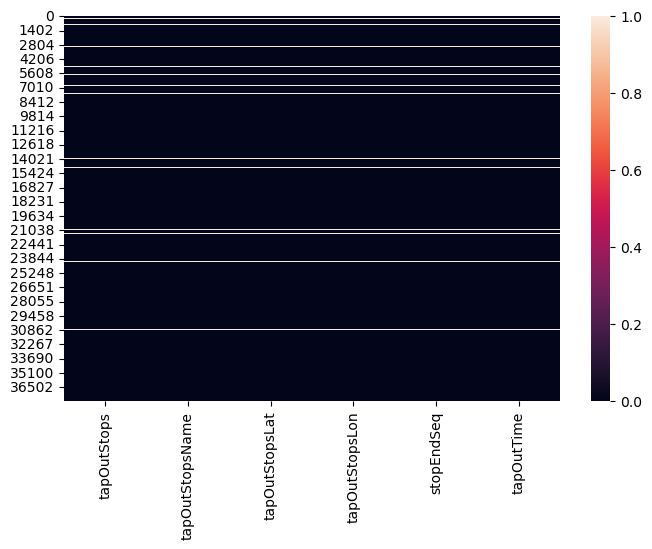

In [60]:
# Plot the missing value in tapOut  
plt.figure(figsize=(8, 5))
sns.heatmap(dfclean[['tapOutStops', 'tapOutStopsName', 
                     'tapOutStopsLat', 'tapOutStopsLon', 
                     'stopEndSeq','tapOutTime' ]].isnull(), cmap='rocket')
plt.show()

In [61]:
pd.set_option('display.max_rows', None)
dfclean[['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']].isna().sum().reset_index()

,index,0
0,tapOutStops,1342
1,tapOutStopsName,1342
2,tapOutStopsLat,1342
3,tapOutStopsLon,1342
4,stopEndSeq,1342
5,tapOutTime,1342


From the heatmap above we can see that the null values in `tapOutStops` also the same rows/data in `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, and `tapOutTime`. The total null values for those columns also same. Due to lack of information that no data at all about the tap-out, so we can delete these null values. 

In [62]:
dfclean.dropna(subset=['tapOutStops', 'tapOutStopsName',
                  'tapOutStopsLat', 'tapOutStopsLon',
                  'stopEndSeq','tapOutTime'], 
               inplace=True)

In [63]:
dfclean.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName          0
direction             0
tapInStops            0
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops           0
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount           967
dtype: int64

***TapOutStops, TapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime have been handled succesfully***

### Checking payAmount

In [64]:
dfclean['payAmount'].describe()

count    35536.000000
mean      2704.581270
std       4221.120835
min          0.000000
25%          0.000000
50%       3500.000000
75%       3500.000000
max      20000.000000
Name: payAmount, dtype: float64

In [65]:
dfraw['payAmount'].value_counts()

3500.0     18503
0.0        16648
20000.0     1742
Name: payAmount, dtype: int64

In [66]:
unique_amount = dfraw['payAmount'].unique()
s_columns = ['corridorID', 'payAmount']

for amount in unique_amount:
    filtered_df = dfraw[dfraw['payAmount'] == amount][s_columns].head(5)
    print(f"Rows for Category: {amount}")
    print(filtered_df)
    print("\n")

Rows for Category: 3500.0
  corridorID  payAmount
0          5     3500.0
1         6C     3500.0
2        R1A     3500.0
3        11D     3500.0
4         12     3500.0


Rows for Category: 20000.0
    corridorID  payAmount
5           1T    20000.0
8          B14    20000.0
60         T21    20000.0
70          1T    20000.0
117        T21    20000.0


Rows for Category: 0.0
   corridorID  payAmount
6      JAK.18        0.0
7         NaN        0.0
14     JAK.46        0.0
19     JAK.88        0.0
21     JAK.16        0.0


Rows for Category: nan
Empty DataFrame
Columns: [corridorID, payAmount]
Index: []




From the statistic descriptive of `payAmount`, we know that the feature is not distributed normally. But, the `payAmount` is more likely the categorical value where only 3 type of pay amount, namely : 0.0, 3500.0, and 20000.0. 
Let's check the type of pay amount and investigate the pay amount 0. 

In [67]:
# Checking the payAmount
payamount_corrID = dfclean.loc[:,['corridorID','payAmount']].dropna().groupby(['corridorID','payAmount']).value_counts().reset_index().drop_duplicates()
payamount_corrID.sample(5)

,corridorID,payAmount,0
181,JAK.61,0.0,148
85,7B,3500.0,17
141,JAK.19,0.0,173
196,L13E,3500.0,191
39,1R,3500.0,38


In [68]:
# Checking if there are any same values of corridorID
payamount_corrID[payamount_corrID['corridorID'].duplicated(keep=False)]

,corridorID,payAmount,0
51,3B,0.0,997
52,3B,3500.0,893
53,3B,20000.0,84


From the analysis, we may see that each corridor has 1 type of pay amount. But for corridor 3B, there are 3 types of pay amount. So, let's check this corridor. Fill the NaN value except corridor 3B is measurable because we can map the payamount since each corridor has 1 type of pay amount. So, before moving on to other unique values of corridor ID, we have to check if this corridor 3B has NaN value so we can handle the missing value carefully.

***Deep Analysis***

In [69]:
corridor_3B = dfclean[dfclean['corridorID'] == "3B"]

# Check for NaN values in the 'payAmount' column
has_nan_payamount = corridor_3B['payAmount'].isna().any()
nan_payamount_rows = corridor_3B[corridor_3B['payAmount'].isna()]
print("The total rows of NaN values in corridor 3B is : ", len(nan_payamount_rows))
nan_payamount_rows

The total rows of NaN values in corridor 3B is :  47


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
1719,NPVW580E8N31IT,180074627743328,E-MONEY,"Dt. Karsa Nasyidah, M.Kom.",F,1990,3B,Rusun Flamboyan - Cengkareng,0.0,B03395P,Pal Batu 3,-6.225075,106.841490,5,2023-04-05 16:18:54,B01904P,Kel. Benhil,-6.201552,106.808090,21.0,2023-04-05 17:16:12,NaN
3219,IBPZ304Q9R57KS,180074627743328,E-MONEY,"Dt. Karsa Nasyidah, M.Kom.",F,1990,3B,Rusun Flamboyan - Cengkareng,1.0,B00115P,UPT. LLHD 2,-6.225501,106.834890,17,2023-04-10 06:23:13,B05695P,Telkom Tebet,-6.224064,106.851600,21.0,2023-04-10 07:17:52,NaN
3397,TUBV978F9Z82XZ,6590854673757012,DKI,Bajragin Najmudin,M,1986,3B,Rusun Flamboyan - Cengkareng,1.0,P00294,Sawah Besar Arah Selatan,-6.157368,106.818661,4,2023-04-10 16:13:48,P00292,Harmoni Arah Selatan,-6.162687,106.819920,5.0,2023-04-10 18:12:24,NaN
4069,JPFE337Q1I00JC,30428250357040,BNI,Estiawan Hastuti,M,2008,3B,Rusun Flamboyan - Cengkareng,0.0,P00177,PGC 1,-6.262494,106.866350,1,2023-04-11 17:27:49,B06577P,Blok M Jalur 2,-6.243369,106.801880,24.0,2023-04-11 19:03:42,NaN
4297,HWFZ515R8H30IC,6590854673757012,DKI,Bajragin Najmudin,M,1986,3B,Rusun Flamboyan - Cengkareng,0.0,P00087,Jelambar,-6.166548,106.786510,0,2023-04-12 05:53:35,P00138,Museum Fatahillah,-6.133930,106.812090,9.0,2023-04-12 06:22:52,NaN
4576,LRHX685W6E07CS,567286069354,FLAZZ,"Dt. Atmaja Suartini, M.Farm",F,2000,3B,Rusun Flamboyan - Cengkareng,1.0,B00138P,Bidara Cina 1,-6.229954,106.867350,1,2023-04-12 17:15:12,B05512P,St. Tebet 3,-6.225604,106.859230,7.0,2023-04-12 18:52:17,NaN
4669,PRHA534Y1H52BC,30428250357040,BNI,Estiawan Hastuti,M,2008,3B,Rusun Flamboyan - Cengkareng,0.0,P00177,PGC 1,-6.262494,106.866350,1,2023-04-12 17:33:54,B06577P,Blok M Jalur 2,-6.243369,106.801880,24.0,2023-04-12 19:10:34,NaN
4969,ZIIQ814L4L11VO,30428250357040,BNI,Estiawan Hastuti,M,2008,3B,Rusun Flamboyan - Cengkareng,1.0,B02114P,Lapangan Blok S,-6.237011,106.814210,6,2023-04-13 06:03:42,B00290P,Dammara,-6.254190,106.831460,18.0,2023-04-13 07:01:03,NaN
5927,YUDK995Y4U99MM,501828129459,FLAZZ,"Unjani Damanik, S.T.",M,1975,3B,Rusun Flamboyan - Cengkareng,0.0,P00056,Explorer Tanah Abang,-6.184305,106.811580,13,2023-04-14 16:27:34,B02972P,Pospol Jati Bunder,-6.189707,106.813170,15.0,2023-04-14 18:14:19,NaN
6611,GAFM068R4R29BR,347204308990092,E-MONEY,R.M. Labuh Laksmiwati,F,1984,3B,Rusun Flamboyan - Cengkareng,1.0,P00254,Tendean,-6.240213,106.831020,12,2023-04-18 05:26:43,P00129,Mampang Prapatan,-6.242699,106.825720,14.0,2023-04-18 06:08:41,NaN


In [70]:
nan_payamount_rows['tapInStops'].unique()

array(['B03395P', 'B00115P', 'P00294', 'P00177', 'P00087', 'B00138P',
       'B02114P', 'P00056', 'P00254', 'B05695P', 'B04101P', 'B02272P',
       'P00200', 'B01323P', 'B02965P', 'B05423P', 'B03012P', 'B00159P',
       'P00112', 'B01638P', 'P00208', 'P00129', 'B01994P', 'B01968P',
       'B00257P', 'B05783P', 'B03319P', 'B02155P', 'B01787P', 'B02554P',
       'B03318P', 'B02062P'], dtype=object)

The total rows of NaN values in corridor 3B is 47. Let's deep dive into these rows. We can start to see if there's any correlation of `payAmount` and `tapInStops`.

In [71]:
dfclean.loc[dfclean['tapInStops'] == 'B03395P', ['tapInStops','tapOutStops','payAmount']].head(10)

,tapInStops,tapOutStops,payAmount
410,B03395P,B04907P,3500.0
519,B03395P,B01904P,NaN
1010,B03395P,B04907P,3500.0
1119,B03395P,B01904P,NaN
1610,B03395P,B04907P,3500.0
1719,B03395P,B01904P,NaN
2210,B03395P,B04907P,3500.0
2319,B03395P,B01904P,NaN
2810,B03395P,B04907P,3500.0
2919,B03395P,B01904P,NaN


In [72]:
dfclean.loc[dfclean['tapInStops'] == 'B00115P', ['tapInStops','tapOutStops','payAmount']].head(10)

,tapInStops,tapOutStops,payAmount
219,B00115P,B05695P,NaN
488,B00115P,B03318P,3500.0
819,B00115P,B05695P,NaN
1088,B00115P,B03318P,3500.0
1419,B00115P,B05695P,NaN
1688,B00115P,B03318P,3500.0
2019,B00115P,B05695P,NaN
2288,B00115P,B03318P,3500.0
2619,B00115P,B05695P,NaN
2888,B00115P,B03318P,3500.0


In [73]:
dfclean.loc[dfclean['tapInStops'] == 'P00294', ['tapInStops','tapOutStops','payAmount']]

,tapInStops,tapOutStops,payAmount
397,P00294,P00292,NaN
997,P00294,P00292,NaN
1597,P00294,P00292,NaN
2197,P00294,P00292,NaN
3397,P00294,P00292,NaN
3997,P00294,P00292,NaN
4597,P00294,P00292,NaN
5197,P00294,P00292,NaN
5797,P00294,P00292,NaN
6397,P00294,P00292,NaN


In [74]:
dfclean.loc[dfclean['tapInStops'] == 'P00177', ['tapInStops','tapOutStops','payAmount']]

,tapInStops,tapOutStops,payAmount
469,P00177,B06577P,NaN
1069,P00177,B06577P,NaN
1669,P00177,B06577P,NaN
2269,P00177,B06577P,NaN
2869,P00177,B06577P,NaN
3469,P00177,B06577P,NaN
4069,P00177,B06577P,NaN
4669,P00177,B06577P,NaN
5269,P00177,B06577P,NaN
5869,P00177,B06577P,NaN


In [75]:
dfclean.loc[dfclean['tapInStops'] == 'P00087', ['tapInStops','tapOutStops','payAmount']]

,tapInStops,tapOutStops,payAmount
97,P00087,P00138,NaN
697,P00087,P00138,NaN
1297,P00087,P00138,NaN
1897,P00087,P00138,NaN
2497,P00087,P00138,NaN
3097,P00087,P00138,NaN
3697,P00087,P00138,NaN
4297,P00087,P00138,NaN
4897,P00087,P00138,NaN
5497,P00087,P00138,NaN


From some samples of `tapInStops` where the `corridorID` is 3B and `payAmount` is NaN, we see that `tapInStops` has spesific or 1 type of payAmount, excluding the NaN value. Because we have 47 rows, let's create a copy dataframe so we can change the `payAmount` data type into category and see if the `tapInStops` have correlation with `payAmount`.

In [76]:
filtered = dfclean.groupby('tapInStops')['payAmount'].unique().reset_index()
filtered

,tapInStops,payAmount
0,B00001P,[0.0]
1,B00004P,[3500.0]
2,B00005P,[3500.0]
3,B00008P,[0.0]
4,B00017P,[0.0]
5,B00018P,[0.0]
6,B00027P,[0.0]
7,B00028P,[0.0]
8,B00030P,[3500.0]
9,B00031P,[3500.0]


In [77]:
unique_tapInStops = nan_payamount_rows['tapInStops'].unique()
filtered_tapInStops_df = filtered[filtered['tapInStops'].isin(unique_tapInStops)]
filtered_tapInStops_df

,tapInStops,payAmount
52,B00115P,"[nan, 3500.0]"
65,B00138P,"[nan, 0.0]"
78,B00159P,"[nan, 3500.0]"
120,B00257P,"[nan, 3500.0]"
483,B01323P,[nan]
582,B01638P,"[0.0, 3500.0, nan]"
618,B01787P,"[0.0, 3500.0, nan]"
685,B01968P,"[nan, 3500.0]"
694,B01994P,[nan]
724,B02062P,[nan]


From the result above, we can see the NaN value that has another value (ex : B00115P has payAmount 3500), we can fill the NaN value of this `tapInStops` B00115P (in `corridorID` 3B) using `payAmount` 3500.0, likewise with others that have a pay amount, ignoring the nan value.  
For other `tapInStops` that only have NaN and have more than one `payAmount`, we will treat later.  

### Handle Missing Values in payAmount

In [78]:
# Fill NaN of these rows where corridorID is 3B and tapInStops 3500 pay amount

tapin35_3B = ['B00115P', 'B00159P', 'B00257P', 'B01968P', 'B02114P', 'B02155P', 'B02554P', 'B02965P', 'B03318P', 'B03395P', 
'B04101P', 'B05423P', 'B05695P', 'P00056', 'P00087', 
'P00129', 'P00177', 'P00200', 'P00208', 'P00254']

# Fill NaN values in 'payAmount' with 3500.0 for the specified conditions
dfclean.loc[
    (dfclean['corridorID'] == "3B") & 
    (dfclean['tapInStops'].isin(tapin35_3B)) & 
    (dfclean['payAmount'].isna()), 
    'payAmount'
] = 3500.0

In [79]:
dfclean.loc[(dfclean['corridorID'] == "3B") & (dfclean['tapInStops'].isin(tapin35_3B))]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
1719,NPVW580E8N31IT,180074627743328,E-MONEY,"Dt. Karsa Nasyidah, M.Kom.",F,1990,3B,Rusun Flamboyan - Cengkareng,0.0,B03395P,Pal Batu 3,-6.225075,106.84149,5,2023-04-05 16:18:54,B01904P,Kel. Benhil,-6.201552,106.80809,21.0,2023-04-05 17:16:12,3500.0
2210,UKZC312W0C24JR,4104888875282062619,BRIZZI,Tgk. Uda Gunarto,F,1996,3B,Rusun Flamboyan - Cengkareng,1.0,B03395P,Pal Batu 3,-6.225075,106.84149,2,2023-04-06 16:09:40,B04907P,Simpang Kawi Raya,-6.209476,106.83322,11.0,2023-04-06 17:52:27,3500.0
2940,ORCQ534O8T46DF,342370004909630,E-MONEY,"Kartika Habibi, S.Psi",M,1975,3B,Rusun Flamboyan - Cengkareng,1.0,B02554P,Pal Batu 2,-6.224559,106.84460,3,2023-04-07 16:22:05,B02396P,Mega Kuningan,-6.224556,106.82677,9.0,2023-04-07 18:06:36,3500.0
3219,IBPZ304Q9R57KS,180074627743328,E-MONEY,"Dt. Karsa Nasyidah, M.Kom.",F,1990,3B,Rusun Flamboyan - Cengkareng,1.0,B00115P,UPT. LLHD 2,-6.225501,106.83489,17,2023-04-10 06:23:13,B05695P,Telkom Tebet,-6.224064,106.85160,21.0,2023-04-10 07:17:52,3500.0
4069,JPFE337Q1I00JC,30428250357040,BNI,Estiawan Hastuti,M,2008,3B,Rusun Flamboyan - Cengkareng,0.0,P00177,PGC 1,-6.262494,106.86635,1,2023-04-11 17:27:49,B06577P,Blok M Jalur 2,-6.243369,106.80188,24.0,2023-04-11 19:03:42,3500.0
4297,HWFZ515R8H30IC,6590854673757012,DKI,Bajragin Najmudin,M,1986,3B,Rusun Flamboyan - Cengkareng,0.0,P00087,Jelambar,-6.166548,106.78651,0,2023-04-12 05:53:35,P00138,Museum Fatahillah,-6.133930,106.81209,9.0,2023-04-12 06:22:52,3500.0
4669,PRHA534Y1H52BC,30428250357040,BNI,Estiawan Hastuti,M,2008,3B,Rusun Flamboyan - Cengkareng,0.0,P00177,PGC 1,-6.262494,106.86635,1,2023-04-12 17:33:54,B06577P,Blok M Jalur 2,-6.243369,106.80188,24.0,2023-04-12 19:10:34,3500.0
4969,ZIIQ814L4L11VO,30428250357040,BNI,Estiawan Hastuti,M,2008,3B,Rusun Flamboyan - Cengkareng,1.0,B02114P,Lapangan Blok S,-6.237011,106.81421,6,2023-04-13 06:03:42,B00290P,Dammara,-6.254190,106.83146,18.0,2023-04-13 07:01:03,3500.0
5927,YUDK995Y4U99MM,501828129459,FLAZZ,"Unjani Damanik, S.T.",M,1975,3B,Rusun Flamboyan - Cengkareng,0.0,P00056,Explorer Tanah Abang,-6.184305,106.81158,13,2023-04-14 16:27:34,B02972P,Pospol Jati Bunder,-6.189707,106.81317,15.0,2023-04-14 18:14:19,3500.0
6465,QXNN668U6F02RD,4941966320527194737,BRIZZI,Widya Nuraini,F,1994,3B,Rusun Flamboyan - Cengkareng,0.0,P00208,RS Sumber Waras,-6.166294,106.79675,5,2023-04-17 16:01:05,P00087,Jelambar,-6.166548,106.78651,7.0,2023-04-17 16:55:25,3500.0


In [80]:
# Fill NaN of these rows where corridorID is 3B and tapInStops 0 pay amount

tapin0_3B = ['B00138P', 'B02272P']

# Fill NaN values in 'payAmount' with 3500.0 for the specified conditions
dfclean.loc[
    (dfclean['corridorID'] == "3B") & 
    (dfclean['tapInStops'].isin(tapin0_3B)) & 
    (dfclean['payAmount'].isna()), 
    'payAmount'
] = 0.0

In [81]:
dfclean.loc[(dfclean['corridorID'] == "3B") & (dfclean['tapInStops'].isin(tapin0_3B))]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
4576,LRHX685W6E07CS,567286069354,FLAZZ,"Dt. Atmaja Suartini, M.Farm",F,2000,3B,Rusun Flamboyan - Cengkareng,1.0,B00138P,Bidara Cina 1,-6.229954,106.86735,1,2023-04-12 17:15:12,B05512P,St. Tebet 3,-6.225604,106.85923,7.0,2023-04-12 18:52:17,0.0
11476,OKGH456J1X73MF,567286069354,FLAZZ,"Dt. Atmaja Suartini, M.Farm",F,2000,3B,Rusun Flamboyan - Cengkareng,0.0,B02272P,Masjid As Sudairi,-6.220626,106.85910,1,2023-04-28 06:37:04,B01732P,Jatinegara Timur,-6.220486,106.86825,11.0,2023-04-28 07:29:27,0.0
15847,WOXJ348V2W15XX,180076677620512,E-MONEY,Shakila Siregar,M,1994,3B,Rusun Flamboyan - Cengkareng,0.0,B00138P,Bidara Cina 1,-6.229954,106.86735,1,2023-04-06 18:59:21,B06072P,Jln. Panti Asuhan,-6.229585,106.87395,6.0,2023-04-06 19:53:07,0.0
31847,MVTV839G8P70LI,180076677620512,E-MONEY,Shakila Siregar,M,1994,3B,Rusun Flamboyan - Cengkareng,0.0,B00138P,Bidara Cina 1,-6.229954,106.86735,1,2023-04-28 19:27:47,B06072P,Jln. Panti Asuhan,-6.229585,106.87395,6.0,2023-04-28 20:36:32,0.0


All the rows with `corridorID` 3B and have NaN value in `payAmount` have been filled with the corresponding `payAmount`. Let's see the rest of it where they have 3 types of `payAmount`. 

In [82]:
left_null_3B = dfclean[dfclean['corridorID'] == "3B"]

# Check for the remaining NaN values in the 'payAmount' column for corridor 3B
left_nan_payamount = left_null_3B['payAmount'].isna().any()
left_nan_payamount_rows = left_null_3B[left_null_3B['payAmount'].isna()]
print("The total remaining of NaN values in corridor 3B is : ", len(left_nan_payamount_rows))
print("The tapInStops names are : ", left_nan_payamount_rows['tapInStops'].unique())

The total remaining of NaN values in corridor 3B is :  14
The tapInStops names are :  ['P00294' 'B01323P' 'B03012P' 'P00112' 'B01638P' 'B01994P' 'B05783P'
 'B03319P' 'B01787P' 'B02062P']


Let's inspect these tapInstops one by one. 

In [83]:
dfclean.loc[dfclean['tapInStops'] == 'P00112', ['tapInStops','tapOutStops','payAmount']]

,tapInStops,tapOutStops,payAmount
12137,P00112,B06579P,20000.0
12327,P00112,B01094P,3500.0
12342,P00112,B06577P,NaN
12370,P00112,B06579P,20000.0
13137,P00112,B06579P,20000.0
13327,P00112,B01094P,3500.0
13342,P00112,B06577P,NaN
13370,P00112,B06579P,20000.0
14137,P00112,B06579P,20000.0
14327,P00112,B01094P,3500.0


**We found another something correlated!**  
For the `tapInStops` P00112 we found some pattern with the `tapOutStops` where this tap-in has 4 tapOutStops and corresponding pay amount, namely :  
- B06577P = 3500.0, NaN 
- B06579P = 20000.0  
- B01094P = 3500.0   
- P00017 = 3500.0  

All the null values come from `tapOutStops` B06577P which means we can fill these null value with 3500.0. 

In [84]:
# Fill NaN values of payamount in corridorID 3B where tapInStops P00112 and tapOutStops B06577P  

dfclean.loc[
    (dfclean['corridorID'] == "3B") & 
    (dfclean['tapInStops'] == "P00112") & 
    (dfclean['tapOutStops'] == "B06577P") & 
    (dfclean['payAmount'].isna()), 
    'payAmount'
] = 3500.0

In [85]:
# Checking if still Nan Values
dfclean.loc[(dfclean['corridorID'] == "3B") & (dfclean['tapInStops'] == "P00112") & (dfclean['tapOutStops'] == "B06577P") & 
            (dfclean['payAmount'].isna())]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


In [86]:
dfclean.loc[dfclean['tapInStops'] == 'B01638P', ['tapInStops','tapOutStops','payAmount']]

,tapInStops,tapOutStops,payAmount
291,B01638P,B00816P,0.0
357,B01638P,B03261P,0.0
957,B01638P,B03261P,0.0
1491,B01638P,B00816P,0.0
1557,B01638P,B03261P,0.0
2091,B01638P,B00816P,0.0
2157,B01638P,B03261P,0.0
2691,B01638P,B00816P,0.0
2757,B01638P,B03261P,0.0
3291,B01638P,B00816P,0.0


For the `tapInStops` B01638P we found some pattern with the `tapOutStops` where this tap-in has tapOutStops and corresponding pay amount, namely :  
- B00816P, B03261P, B05143P = 0  
- B05666P, B01200P, B01437P, B05315P, B03312P = 3500  
- B01766P = nan

All the null values come from `tapOutStops` B01766P, we can fill the NaN values using 0.0 or 3500.0. In this case, we can fill the NaN values using mode, which is 3500.0

In [87]:
# Fill NaN values of payamount in corridorID 3B where tapInStops P00112 and tapOutStops B01766P  

dfclean.loc[
    (dfclean['corridorID'] == "3B") & 
    (dfclean['tapInStops'] == "B01638P") & (dfclean['tapOutStops'] == "B01766P") & 
    (dfclean['payAmount'].isna()), 
    'payAmount'
] = 3500.0

In [88]:
dfclean.loc[dfclean['tapInStops'] == 'B01787P', ['tapInStops','tapOutStops','payAmount']]

,tapInStops,tapOutStops,payAmount
471,B01787P,P00083,0.0
1071,B01787P,P00083,0.0
1671,B01787P,P00083,0.0
2271,B01787P,P00083,0.0
2871,B01787P,P00083,0.0
3471,B01787P,P00083,0.0
4071,B01787P,P00083,0.0
4671,B01787P,P00083,0.0
5271,B01787P,P00083,0.0
5871,B01787P,P00083,0.0


For the `tapInStops` B01787P we found some pattern with the `tapOutStops` where this tap-in has tapOutStops and corresponding pay amount, namely :  
- P00083 = 0.0 and nan 
- B04537P = 0.0  
- B00825P = 3500.0

Only one null value comes from `tapOutStops` P00083 and we can fill the `payAmount` with 0.0.

In [89]:
# Fill NaN values of payamount in corridorID 3B where tapInStops B01787P and tapOutStops P00083  

dfclean.loc[
    (dfclean['corridorID'] == "3B") & 
    (dfclean['tapInStops'] == "B01787P") & (dfclean['tapOutStops'] == "P00083") & 
    (dfclean['payAmount'].isna()), 
    'payAmount'
] = 0.0

In [90]:
dfclean['payAmount'].isna().sum()

930

**Short Summary**  
1. Each `corridorID` correspond to one type of `payAmount`, so we can fill the NaN values using this correlation.  

2. But, one `corridorID` named "3B" has three types of `payAmount` (0.0, 3500.0, 20000.0) and 47 NaN values as well. So, we have to handle the NaN values carefully.  

3. We found that `payAmount` also has the correlation to `tapInStops` from groupby the unique value in `payAmount`. Some `tapInStops` in corridorID 3B has the value of `payAmount` so we can handle the NaN values using the `payAmount` value. For example, `tapInStops` B00115P has `payAmount` value 3500.0 and also NaN. So, we can fill the NaN value using this value. We can make the list of `payAmount` value that has only one `payAmount` except NaN. They are :
    - a. Fill the NaN values with 3500.0   
    ('B00115P', 'B00159P', 'B00257P', 'B01968P', 'B02114P', 'B02155P', 'B02554P', 'B02965P', 'B03318P', 'B03395P', 'B04101P', 'B05423P', 'B05695P', 'P00056', 'P00087', 'P00129', 'P00177', 'P00200', 'P00208', 'P00254')  

    - b. Fill the NaN values with 0.0   
    ('B00138P', 'B02272P')  
    
4. The remaining NaN values based on `tapInStops` value in `corridorID` 3B that have `payAmount` more than 0 (example : nan, 3500.0, 0.0) is 14 rows. Here's the investigation :  
    - 'P00294' = all NaN  
    - 'B01323P' = all NaN  
    - 'B03012P' = all NaN  
    - 'B01994P' = all NaN  
    - 'B05783P' = all NaN  
    - 'B03319P' = all NaN   
    - 'B02062P' = all NaN  
    - 'P00112'  = 20000.0 and 3500.0   
       - tapOutStops : 	 
            - B06577P = 3500.0, NaN (will be filled by 3500.0)
            - B06579P = 20000.0  
            - B01094P, P00017 = 3500.0  
    - 'B01638P' = 3500.0 and 0.0  
       - tapOutStops :   	
            - B00816P, B03261P, B05143P = 0  
            - B05666P, B01200P, B01437P, B05315P, B03312P = 3500  
            - B01766P = 3500.0 and 0.0 (will be filled by 3500.0)
    - 'B01787P' =  
       - tapOutStops :	
           - P00083 = 0.0, NaN (will be filled by 0.0)
           - B04537P = 0.0  
           - B00825P = 3500.0  

5. We've handled the NaN values in `corridorID` 3B with spesific `tapInStops` and `tapOutStops`, except for the `tapInStops` which have all NaN values.  

6. The NaN values in `payAmount` have been reduced from 1007 to 933

In [91]:
# Checking the corridorID that have NaN values in payAmount
print("Corridors with NaN value in pay amount : ")
dfclean.loc[(dfclean['payAmount'].isna()==True),
             ['corridorID','payAmount']].groupby(['corridorID']).count().drop('payAmount',axis=1).reset_index()['corridorID'].unique()

Corridors with NaN value in pay amount : 


array(['3B', '3H', 'JAK.48A', 'JAK.48B', 'M1H', 'M7B'], dtype=object)

In [92]:
dfclean[dfclean['payAmount'].isna()]['corridorID'].value_counts()

M7B        291
JAK.48A    235
M1H        161
JAK.48B    146
3H          87
3B          10
Name: corridorID, dtype: int64

In [93]:
# Fill NaN values in corridor with all nan values taking 
corridor_pay_amount = dfclean.dropna(subset=['payAmount']).drop_duplicates(subset=['corridorID'])[['corridorID', 'payAmount']].set_index('corridorID')['payAmount'].to_dict()

def fill_na_pay_amount(row):
    if pd.isna(row['payAmount']):
        return corridor_pay_amount.get(row['corridorID'], row['payAmount'])
    return row['payAmount']

dfclean['payAmount'] = dfclean.apply(fill_na_pay_amount, axis=1)

In [94]:
dfclean['payAmount'].isna().sum()

920

In [95]:
dfclean[dfclean['payAmount'].isna()]['corridorID'].value_counts()

M7B        291
JAK.48A    235
M1H        161
JAK.48B    146
3H          87
Name: corridorID, dtype: int64

We may see that using the dictionary mapping, we only can reduce the 20 NaN values which is from 3B. For other corridors, we can map the pay amount with assumption like this :  
- For `corridorID` 3H, based on [this source](https://moovitapp.com/index/id/Tranportasi_Umum-line-3H-Jakarta-2044-851786-177268854-0#:~:text=Tarif%20jalur%203H%20bis%20TransJakarta%203H%20%28Kota%29%20tarif,periksa%20aplikasi%20Moovit%20atau%20situs%20web%20resmi%20TransJakarta.) the pay amount of `corridorID` 3H is 3500.0  
- For `corridorID` M7B, based on [this source](https://moovitapp.com/index/id/Tranportasi_Umum-line-7B-Jakarta-2044-851786-611843-0) the pay amount of `corridorID` M7B is 3500.0  
- For `corridorID` M1H, based on [this source](https://moovitapp.com/index/id/Tranportasi_Umum-line-M1-Jakarta-2044-851786-177268865-0) the pay amount of `corridorID` M1H is 3500.0  
- For `corridorID` JAK.48A and JAK.48B, based on this dataset, all `corridorID` that start with "JAK" have the pay amount 0.0  

With these assumptions, we can fill the NaN values.

In [96]:
mapping_conditions = {
    '3H' : 3500.0, 
    'M7B' : 3500.0, 
    'M1H' : 3500.0, 
    'JAK.48A' : 0.0, 
    'JAK.48B' : 0.0
}
    
def map_nan_pay_amount(row, mapping_conditions):
    if pd.isna(row['payAmount']) and row['corridorID'] in mapping_conditions:
        return mapping_conditions[row['corridorID']]
    else:
        return row['payAmount']

dfclean['payAmount'] = dfclean.apply(lambda row: map_nan_pay_amount(row, mapping_conditions), axis=1)

In [97]:
dfclean.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

***payAmount have been handled succesfully***

### Checking tapInTime and tapOutTime

In [98]:
# Convert object to datetime
cols_date = ['tapInTime', 'tapOutTime']
for col in cols_date:
    dfclean[col] = pd.to_datetime(dfclean[col])

In [99]:
dfclean[cols_date].describe()

C:\Users\myasu\AppData\Local\Temp\ipykernel_21724\488436643.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfclean[cols_date].describe()
C:\Users\myasu\AppData\Local\Temp\ipykernel_21724\488436643.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfclean[cols_date].describe()


,tapInTime,tapOutTime
count,36503,36503
unique,35750,35856
top,2023-04-17 06:01:59,2023-04-17 18:14:19
freq,3,3
first,2023-04-01 06:22:27,2023-04-01 07:27:31
last,2023-04-30 21:51:08,2023-04-30 23:23:18


The dataset contains the data of Transjakarta for 1 month, april 2023.

## Checking Numerical Columns

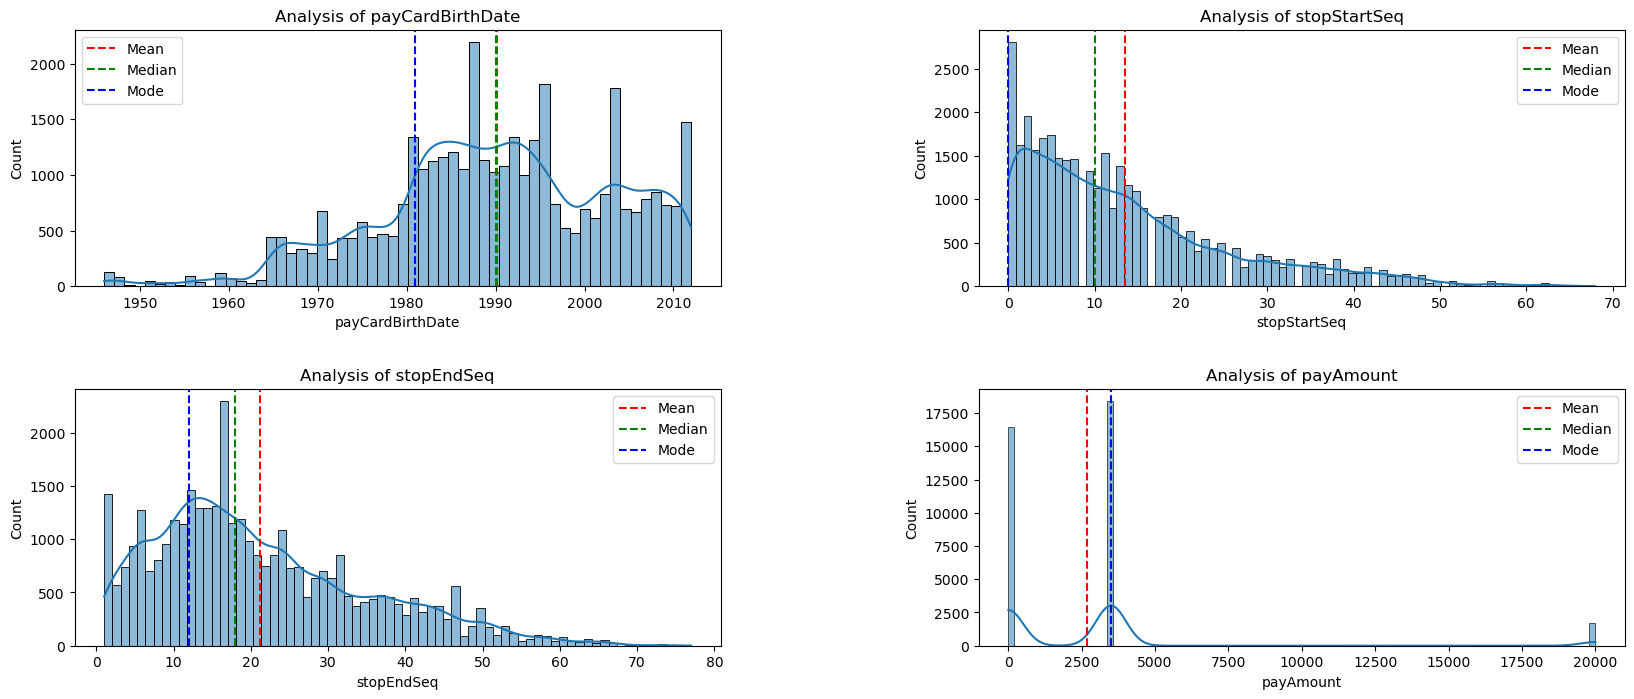

In [100]:
def generate_distribution_plot(train_df, continuous_features):
    # Create copy of dataframe
    data = train_df[continuous_features].copy()
    
    # Determine the number of subplots based on the number of features
    num_features = len(continuous_features)
    ncols = 2
    nrows = (num_features // ncols) + (num_features % ncols > 0)
    
    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    font = {'size': 12}
    
    # Plot each feature
    for ax, feature in zip(axes, data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        
        sns.histplot(data[feature], kde=True, ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()
    
    # Remove any empty subplots
    for j in range(num_features, len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()

s_num = ['payCardBirthDate', 'stopStartSeq', 'stopEndSeq', 'payAmount']
generate_distribution_plot(dfclean, s_num)

In [101]:
dfclean[s_num].describe()

,payCardBirthDate,stopStartSeq,stopEndSeq,payAmount
count,36503.000000,36503.000000,36503.000000,36503.000000
mean,1990.124182,13.560392,21.213051,2687.874969
std,13.036947,12.228117,13.800452,4175.457270
min,1946.000000,0.000000,1.000000,0.000000
25%,1982.000000,4.000000,11.000000,0.000000
50%,1990.000000,10.000000,18.000000,3500.000000
75%,2001.000000,19.000000,29.000000,3500.000000
max,2012.000000,68.000000,77.000000,20000.000000


This is just selected numerical features in the dataset since the others (pay card ID, latitude and longitude) are just the information and no need to be analyzed. This numerical features also doesn't seem any extreme outliers even though the distribution are not normal but it's tolerate. The age of passengers start from 1946 to 2012 and the start-end-seq have range for 0-70s. Meanwhile for the pay amount, as we saw before where this numerical feature more likely categorical value with 3 types of amount, 0.0, 3500.0 and 20000.0.

=====================================================================================================================

# Data Analysis

## 1. Demographic Analysis

### a. Age Group Distribution

Based on [this source](https://www.mentalfloss.com/article/609811/age-ranges-millennials-and-generation-z), we can group the age of passengers to see the age distribution. 

**Age Group by Generation:**  

    - Baby Boomer : 1946 - 1964
    - Gen X : 1965-1980
    - Millenials : 1981-1996
    - Gen Z : 1997-2012

In [102]:
# Feature extraction for payBirthDate column 

def age_group (age):
    if age >= 1946 and age <= 1964:
        return 'Baby Boomer'
    elif age >= 1965 and age <= 1980:
        return 'Gen X'
    elif age >= 1981 and age <= 1996:
        return 'Millenials'
    elif age >= 1997 and age <=2012:
        return 'Gen Z'

dfclean['Age_Group'] = dfclean['payCardBirthDate'].apply(age_group)

In [103]:
# Age Distribution Count
agegroup = dfclean['Age_Group'].value_counts().reset_index()
agegroup

,index,Age_Group
0,Millenials,17847
1,Gen Z,11574
2,Gen X,6284
3,Baby Boomer,798


Text(0.5, 1.0, 'Ratio of Group of Age')

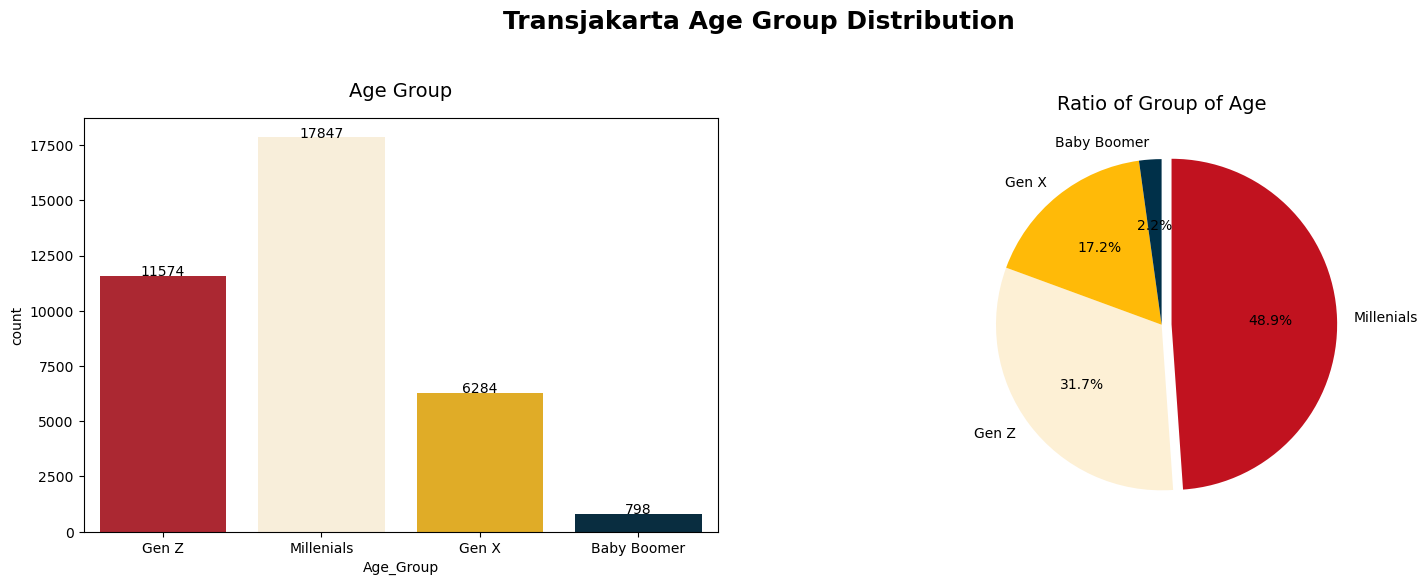

In [104]:
figure, axes = plt.subplots(1, 2,  figsize=(18,6))
figure.suptitle("Transjakarta Age Group Distribution", size=18, fontweight='bold')
figure.subplots_adjust(top=0.8)  # Adjust this value as needed

sns.countplot(x='Age_Group',
            data=dfclean,
            palette=['#C1121F', '#FDF0D5', '#FFBA08', '#003049'],
            ax=axes[0])
axes[0].set_title('Age Group', size=14, pad=15)

for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.0f}', ha="center")

axes[1].pie(agegroup['Age_Group'], labels=agegroup['index'],
        startangle=90, autopct='%.1f%%', counterclock=False,
        colors=['#C1121F', '#FDF0D5', '#FFBA08', '#003049'], 
        explode = [0.06, 0, 0, 0], 
        )
axes[1].set_title("Ratio of Group of Age", size=14)

Based on the age group distribution analysis presented in the bar chart and pie chart:  

**Millennials as the Largest User Group**  
The bar chart shows that Millennials (born between 1981 and 1996) are the largest user group of Transjakarta services, with a total count of 17,847 transactions. This indicates that nearly half of the users fall within this age group.
The pie chart confirms this, showing that Millennials constitute 48.9% of the total transactions.

**Significant Usage by Gen Z**
Gen Z (born between 1997 and 2012) follows as the second-largest group, with 11,574 transactions, accounting for 31.7% of the total transactions. This indicates that younger users are also a major segment of Transjakarta's user base.  

**Moderate Use by Gen X**
Gen X (born between 1965 and 1980) represents a smaller portion of the user base, with 6,284 transactions, which translates to 17.2% of the total transactions. This suggests that middle-aged users are moderately using the services.  

**Minimal Use by Baby Boomers**
Baby Boomers (born between 1946 and 1964) are the smallest user group, with only 798 transactions, making up 2.2% of the total transactions. This indicates that older users are the least likely to use Transjakarta services.

### b. Vehicle Type Distribution

In [105]:
# Add 'Vehicle Type' column
def vehicle (payamount):
    if payamount == 0:
        return 'Jak Lingko'
    elif payamount == 3500:
        return 'Trans Jakarta'
    else:
        return 'Royal Trans'

dfclean['Vehicle_Type'] = dfclean['payAmount'].apply(vehicle)

In [106]:
# Vehicle Type Count
vehiclegroup = dfclean['Vehicle_Type'].value_counts().reset_index().rename(columns={"index" : "Vehicle_Type", "Vehicle_Type" : "Total"})
vehiclegroup

,Vehicle_Type,Total
0,Trans Jakarta,18393
1,Jak Lingko,16423
2,Royal Trans,1687


Text(0.5, 1.0, 'Ratio of Vehicle Type')

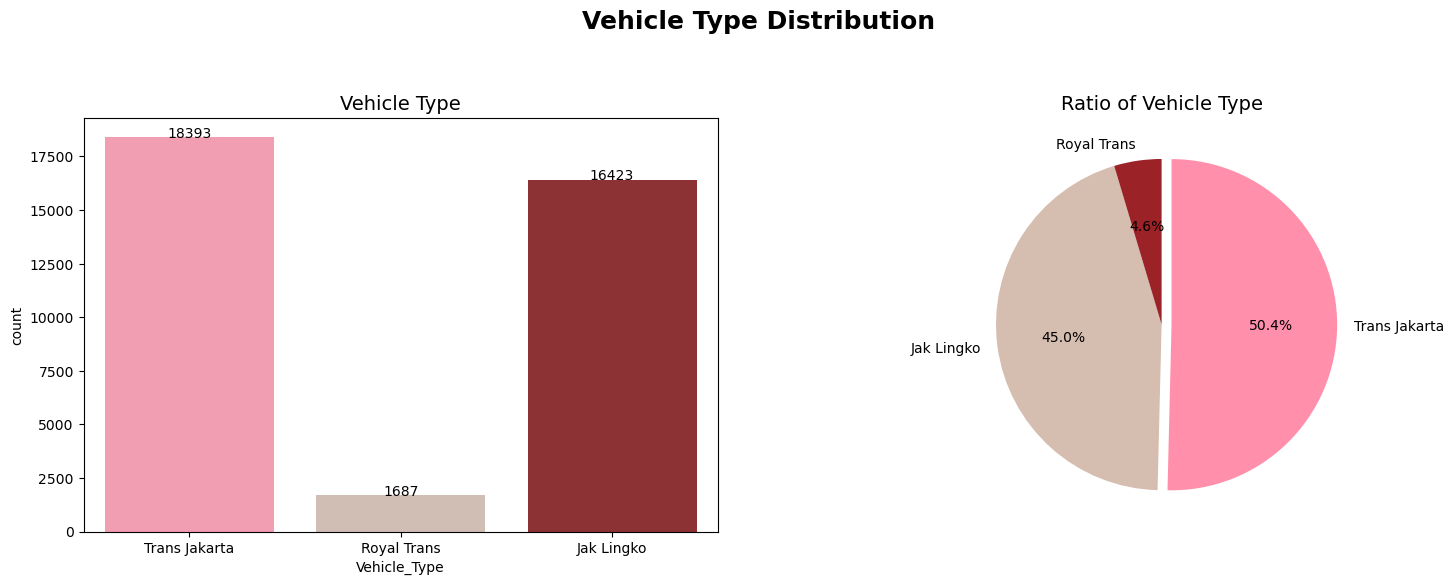

In [107]:
figure, axes = plt.subplots(1, 2,  figsize=(18,6))
figure.suptitle("Vehicle Type Distribution", size=18, fontweight='bold')
figure.subplots_adjust(top=0.8)
sns.countplot(x='Vehicle_Type',
            data=dfclean,
            palette=['#FF8FAB', '#D5BDAF', '#9B2226'],
            ax=axes[0])
axes[0].set_title('Vehicle Type', size=14)

for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.0f}', ha="center")

axes[1].pie(vehiclegroup['Total'], labels=vehiclegroup['Vehicle_Type'],
        startangle=90, autopct='%.1f%%', counterclock=False,
        colors=['#FF8FAB', '#D5BDAF', '#9B2226'], 
        explode = [0.06, 0, 0], 
        )
axes[1].set_title("Ratio of Vehicle Type", size=14)

Based on the vehicle type distribution analysis presented in the bar chart and pie chart:  

**Trans Jakarta Dominance**  
The bar chart shows that the majority of transactions are attributed to Trans Jakarta, with a total count of 18,393 transactions. This indicates that Trans Jakarta is the most utilized vehicle type among passengers.

**Significant Use of Jak Lingko**
Jak Lingko follows closely with 16,423 transactions. This suggests that Jak Lingko also plays a significant role in the public transportation network, catering to a substantial portion of the passenger demand.  

**Limited Use of Royal Trans**
Royal Trans has the least number of transactions, with only 1,687 transactions. This indicates that Royal Trans is the least utilized vehicle type among the three, possibly due to its fare amount since its the highest.  

**Proportional Representation**
The pie chart provides a clear visual representation of the ratio of vehicle types:  
- Trans Jakarta constitutes 50.4% of the total transactions.  
- Jak Lingko accounts for 45.0% of the total transactions.  
- Royal Trans makes up a smaller proportion with 4.6% of the total transactions.

### c. The Comparison Between Gender Based on Vehicle Type

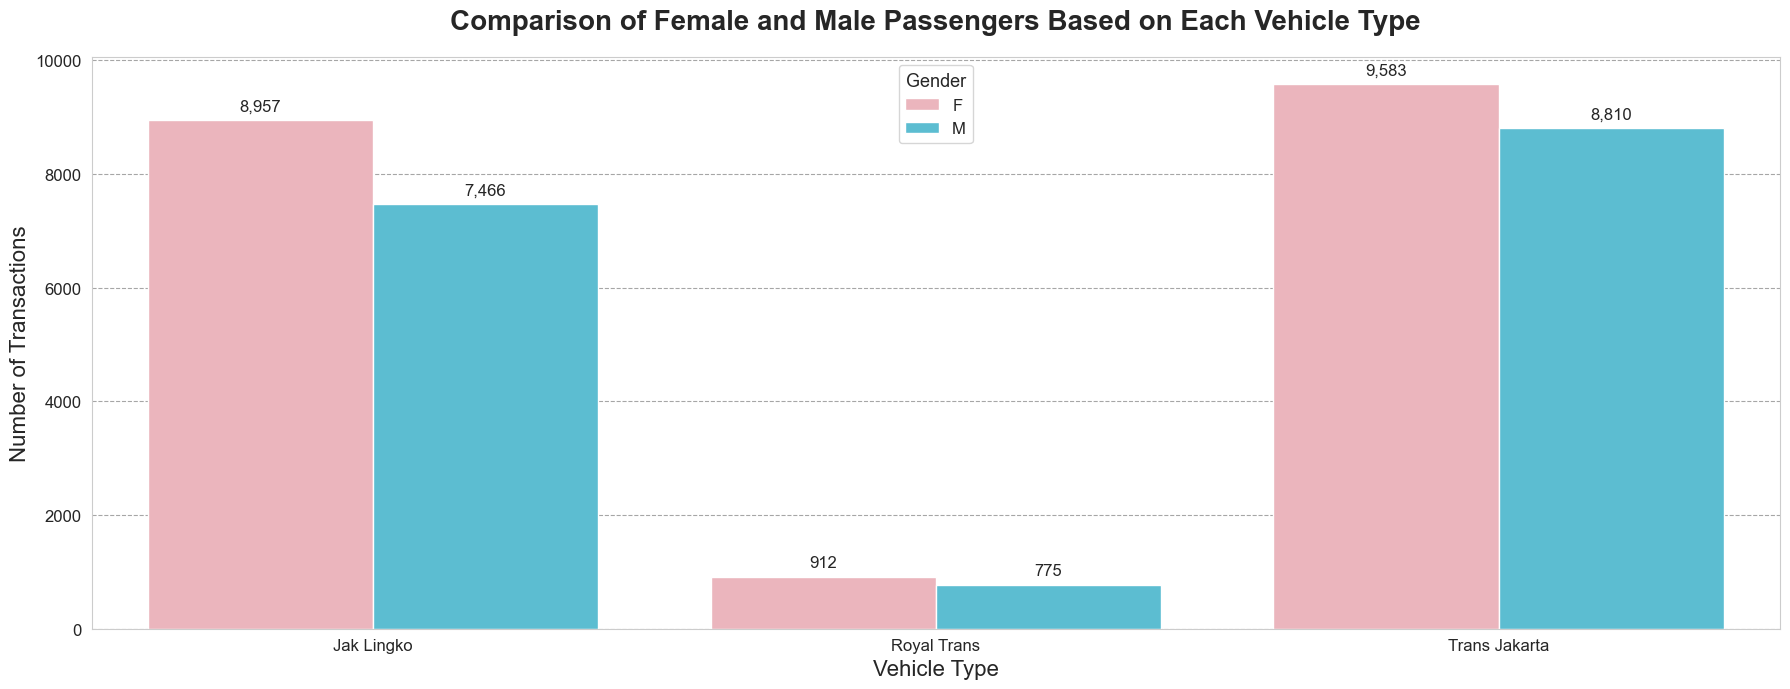

In [147]:
gender_vehicle_trend = dfclean.groupby(['payCardSex', 'Vehicle_Type'])['transID'].count().reset_index().rename(columns={"transID": "Count"})

# Plotting
plt.figure(figsize=(18, 7))
bar_plot = sns.barplot(x='Vehicle_Type', y='Count', hue='payCardSex', data=gender_vehicle_trend, palette=['#f4acb7', '#48cae4'])

# Adding titles and labels
plt.title('Comparison of Female and Male Passengers Based on Each Vehicle Type', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Vehicle Type', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize='13')

# Adding annotations
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height()), ','),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points',
                      fontsize=12)

# Customize grid
bar_plot.yaxis.grid(True, color='gray', linestyle='--', alpha=0.7)
bar_plot.xaxis.grid(False)

plt.tight_layout()
plt.show()


**Vehicle Type Usage by Gender**

- Jak Lingko is more frequently used by females compared to males.   
- Both genders have a relatively low and almost equal usage of Royal Trans, with females slightly higher.  
- Trans Jakarta has a higher usage by females compared to males, similar to Jak Lingko.

**Overall Insights**  

Across all vehicle types, female users tend to have higher transaction counts compared to male users.
The highest usage for both genders is observed in Trans Jakarta, followed by Jak Lingko, and the least usage is in Royal Trans.
The pattern indicates that public transport services might consider focusing on improving and tailoring their services towards the preferences and needs of female users, especially since they form a significant proportion of the user base.

### d. Pay Card Bank and Vehicle Type

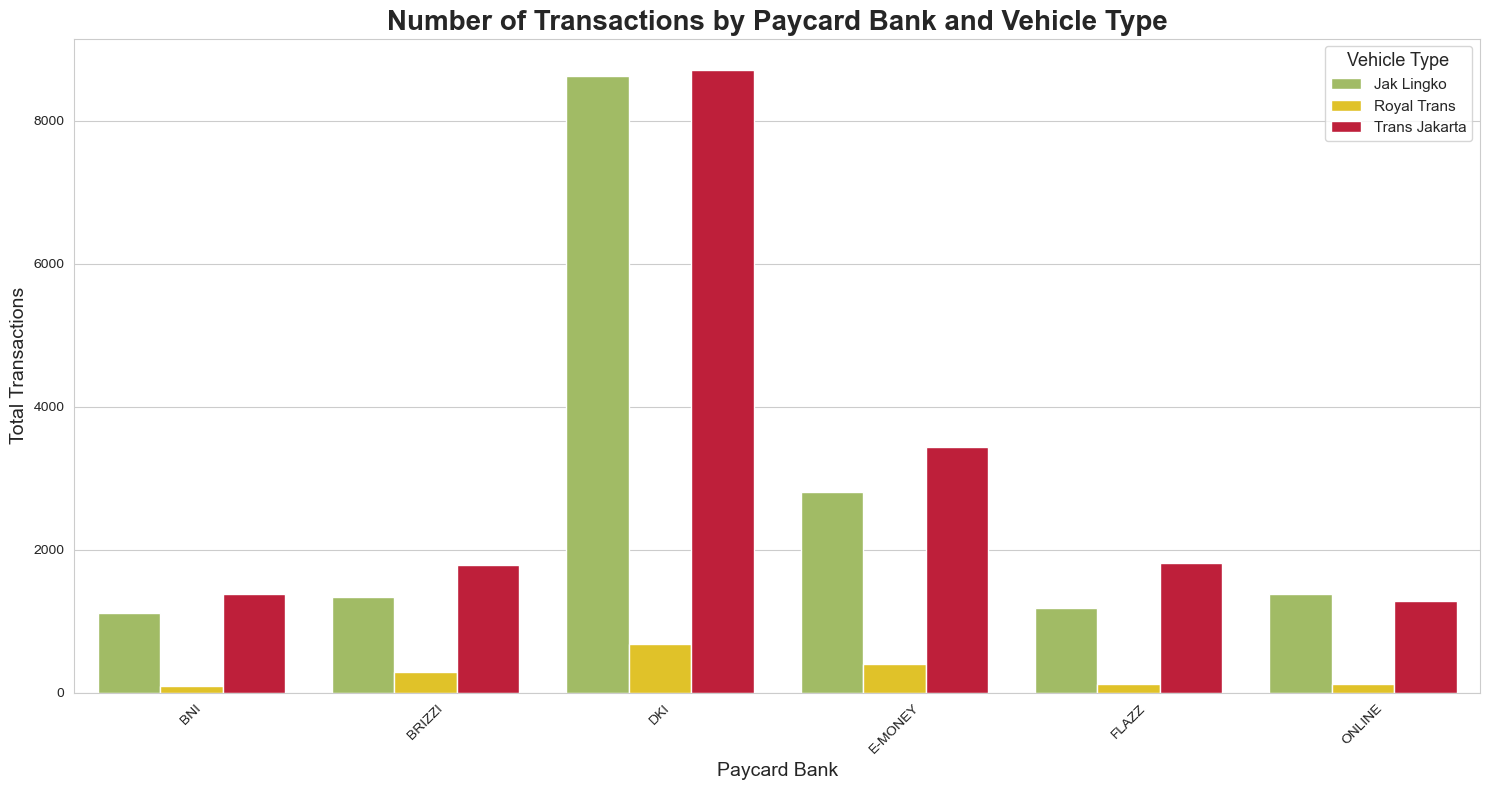

In [157]:
paycard_vehicle_data = dfclean.groupby(['payCardBank', 'Vehicle_Type'])['transID'].count().reset_index()
paycard_vehicle_data = paycard_vehicle_data.rename(columns={'transID': 'Total Transactions'})

# Plotting
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')
sns.barplot(data=paycard_vehicle_data, x='payCardBank', y='Total Transactions', hue='Vehicle_Type', palette=['#a7c957', '#ffd60a', '#d90429'])

# Add title and labels
plt.title('Number of Transactions by Paycard Bank and Vehicle Type', fontsize=20, fontweight='bold')
plt.xlabel('Paycard Bank', fontsize=14)
plt.ylabel('Total Transactions', fontsize=14)
plt.legend(title='Vehicle Type', title_fontsize='13', fontsize='11')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
# Group by 'paycardBank' and 'Vehicle_Type' and count the number of transactions
paycard_vehicle_data = dfclean.groupby(['payCardBank', 'Vehicle_Type'])['transID'].count().reset_index()
paycard_vehicle_data = paycard_vehicle_data.rename(columns={'transID': 'Total Transactions'})

# Create a sunburst plot
fig = px.sunburst(
    paycard_vehicle_data, 
    path=['payCardBank', 'Vehicle_Type'], 
    values='Total Transactions',
    color='Vehicle_Type',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Number of Transactions by Paycard Bank and Vehicle Type')

# Update layout for better readability
fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0),
    title_font_size=20,
    title_x=0.5,
    uniformtext=dict(minsize=10, mode='show'),
    legend=dict(
        title="Vehicle Type",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1))

# Update the trace to show the count numbers
fig.update_traces(
    textinfo="label+percent entry",
    insidetextorientation='radial'
)

fig.show()

### e. Peak Hours Analysis

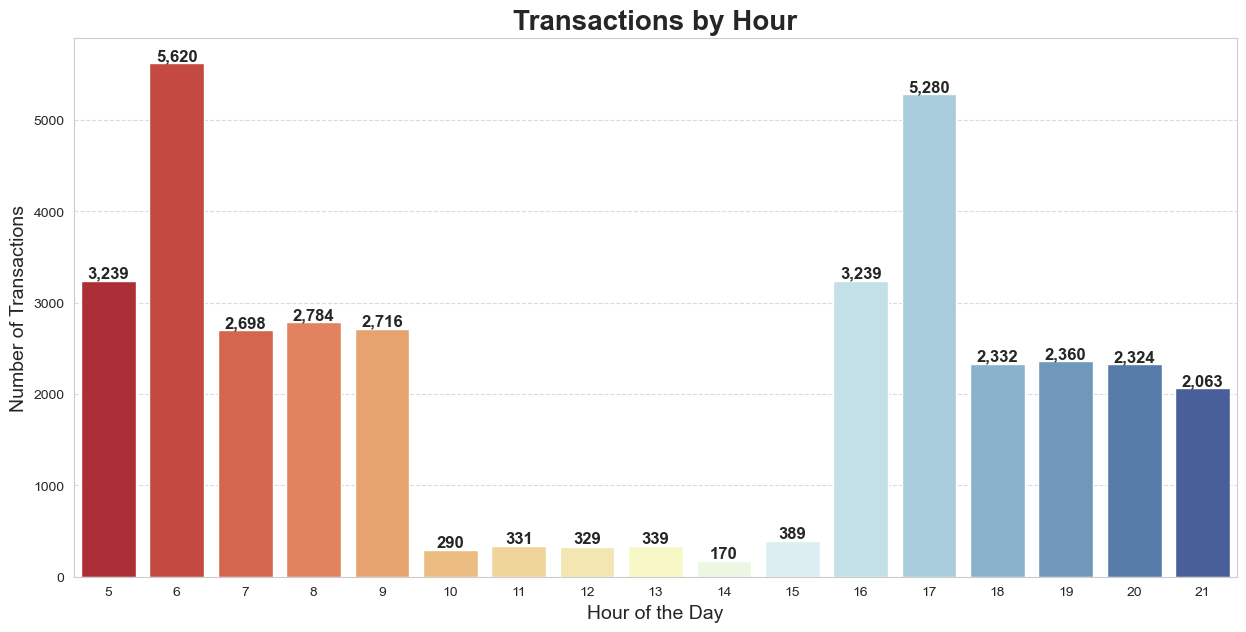

In [145]:
# Peak hours analysis
peak_hours = dfclean.groupby('hour').size().reset_index(name='Number of Transactions')

sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))

# Plotting
bar_plot = sns.barplot(x='hour', y='Number of Transactions', data=peak_hours, palette='RdYlBu')
bar_plot.set_title('Transactions by Hour', fontsize=20, fontweight='bold')
bar_plot.set_xlabel('Hour of the Day', fontsize=14)
bar_plot.set_ylabel('Number of Transactions', fontsize=14)

# Annotation
for container in bar_plot.containers:
    bar_plot.bar_label(container, labels=[f'{int(height):,}' for height in container.datavalues], 
                       label_type='edge', fontsize=12, weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [108]:
# Feature extraction for datetime

dfclean['day'] = dfclean['tapInTime'].dt.day
dfclean['week'] = dfclean['tapInTime'].dt.isocalendar().week
dfclean['hour'] = dfclean['tapInTime'].dt.hour
dfclean['day_name'] = dfclean['tapInTime'].dt.day_name()

In [109]:
dfclean.to_csv('Transjakarta_cleaned.csv', index=False)

## 2. Deep Analysis

In [142]:
trend = dfclean.copy()

# Extract the datetime into day, week, hour

trend['day'] = trend['tapInTime'].dt.day
trend['week'] = trend['tapInTime'].dt.isocalendar().week
trend['hour'] = trend['tapInTime'].dt.hour
trend['day_name'] = trend['tapInTime'].dt.day_name()

### 1. *Peak Days Identification*

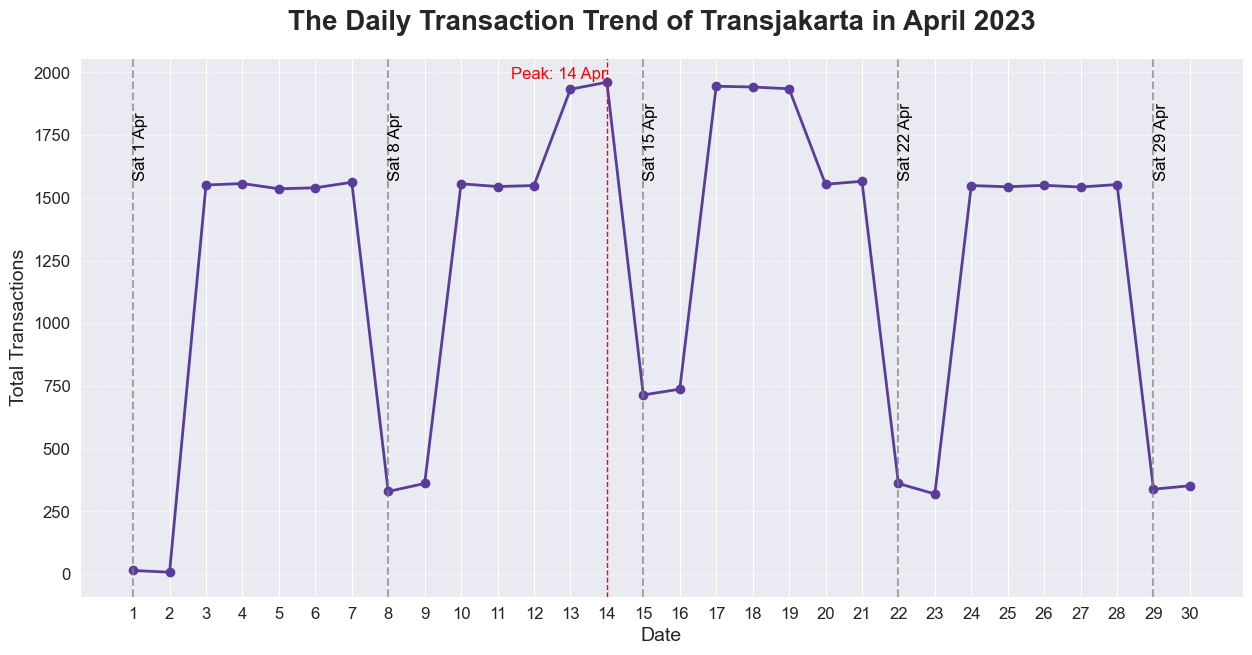

In [158]:
# Group by date and count transactions
daily_trend = trend.groupby('day')['transID'].count()

# Set plot style
sns.set_style('darkgrid')

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(daily_trend, color='#5a3d9a', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.xticks(ticks=np.arange(1, 31), fontsize=12)
plt.yticks(fontsize=12)
plt.title("The Daily Transaction Trend of Transjakarta in April 2023", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Transactions", fontsize=14)

# Annotate specific days (Saturdays in April 2023)
saturdays = [1, 8, 15, 22, 29]
annotations = ['Sat 1 Apr', 'Sat 8 Apr', 'Sat 15 Apr', 'Sat 22 Apr', 'Sat 29 Apr']
for day, annotation in zip(saturdays, annotations):
    plt.axvline(day, color='gray', linestyle='--', alpha=0.7)
    plt.text(day, daily_trend.max() * 0.80, annotation, rotation=90, color='black', 
             verticalalignment='bottom', fontsize=12)

    
# Highlight the peak day
peak_day = daily_trend.idxmax()
peak_value = daily_trend.max()
plt.axvline(peak_day, color='red', linestyle='--', linewidth=1)
plt.text(peak_day, peak_value, f'Peak: {peak_day} Apr', color='red', 
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [159]:
# Checking the dataframe

daily_trend.reset_index().rename(columns={"transID" : "Total Transactions"})

,day,Total Transactions
0,1,14
1,2,7
2,3,1551
3,4,1557
4,5,1536
5,6,1540
6,7,1562
7,8,329
8,9,361
9,10,1556


In [118]:
# The peak days
peak_days = [13, 14, 17, 18, 19]

peak_data = trend[trend['day'].isin(peak_days)]
peak_transactions = peak_data.groupby('day')['transID'].count().reset_index().rename(columns={"transID": "Total Transaction"})

print("Peak Days with Number of Transactions:")
peak_transactions

Peak Days with Number of Transactions:


,day,Total Transaction
0,13,1933
1,14,1961
2,17,1945
3,18,1942
4,19,1935


### 2. Peak Hours Identification based on Peak Dates

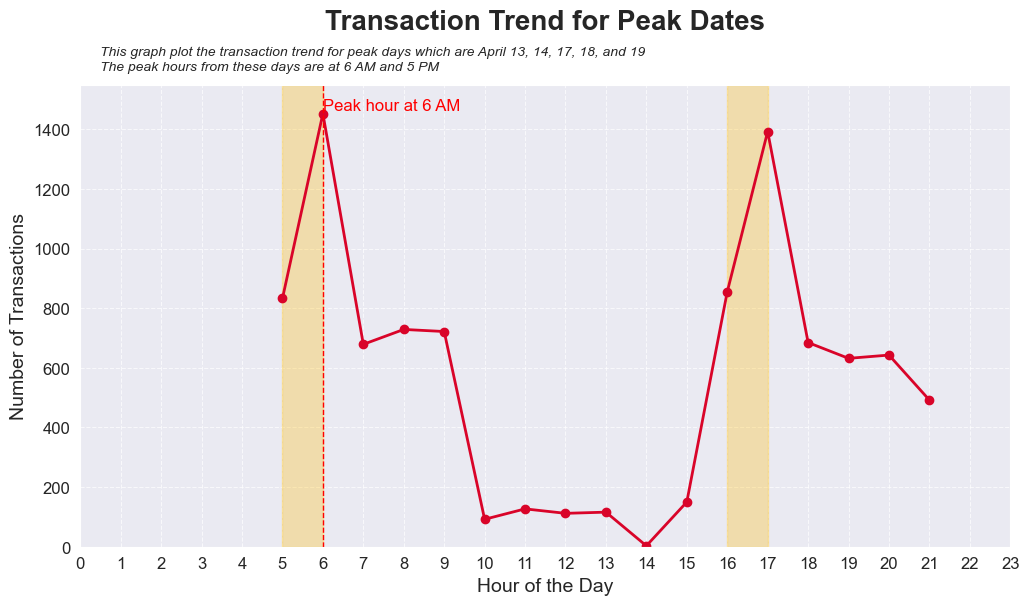

In [125]:
peak_data = trend[trend['day'].isin(peak_days)]

# Group by hour and count transactions
hourly_trend = peak_data.groupby('hour')['transID'].count()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(hourly_trend.index, hourly_trend.values, color='#D90429', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Transaction Trend for Peak Dates', fontsize=20, fontweight='bold', pad = 40)
plt.text(x=0.5, y=1600, s="This graph plot the transaction trend for peak days which are April 13, 14, 17, 18, and 19\nThe peak hours from these days are at 6 AM and 5 PM", fontsize=10, fontstyle='italic')
plt.ylim(0, 1550)

# Highlight the peak day
peak_hour = hourly_trend.idxmax()
peak_hour_value = hourly_trend.max()
plt.axvline(peak_hour, color='red', linestyle='--', linewidth=1)
plt.text(peak_hour, peak_hour_value, f'Peak hour at {peak_hour} AM', color='red', 
         verticalalignment='bottom', horizontalalignment='left', fontsize=12)

plt.stackplot(range(5,7), [[1550]], color='#FFBE0B', alpha=0.3)
plt.stackplot(range(16,18), [[1550]], color='#FFBE0B', alpha=0.3)

plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(np.arange(24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3. Crowded Corridors
**a. Based on Transactions**

In [166]:
# Create a dataframe for the most total transactions happened in each corrridors

active_corridor = trend.groupby(['day','corridorName']).size().sort_values(ascending=False).reset_index().rename(columns={0 : "Total_Trx"})
active_corridor

,day,corridorName,Total_Trx
0,19,Rusun Flamboyan - Cengkareng,111
1,14,Rusun Flamboyan - Cengkareng,110
2,17,Rusun Flamboyan - Cengkareng,109
3,27,Rusun Flamboyan - Cengkareng,105
4,3,Rusun Flamboyan - Cengkareng,105
5,18,Rusun Flamboyan - Cengkareng,99
6,6,Rusun Flamboyan - Cengkareng,97
7,5,Rusun Flamboyan - Cengkareng,92
8,28,Rusun Flamboyan - Cengkareng,91
9,7,Rusun Flamboyan - Cengkareng,90


In [161]:
dfclean['corridorName'].nunique()

216

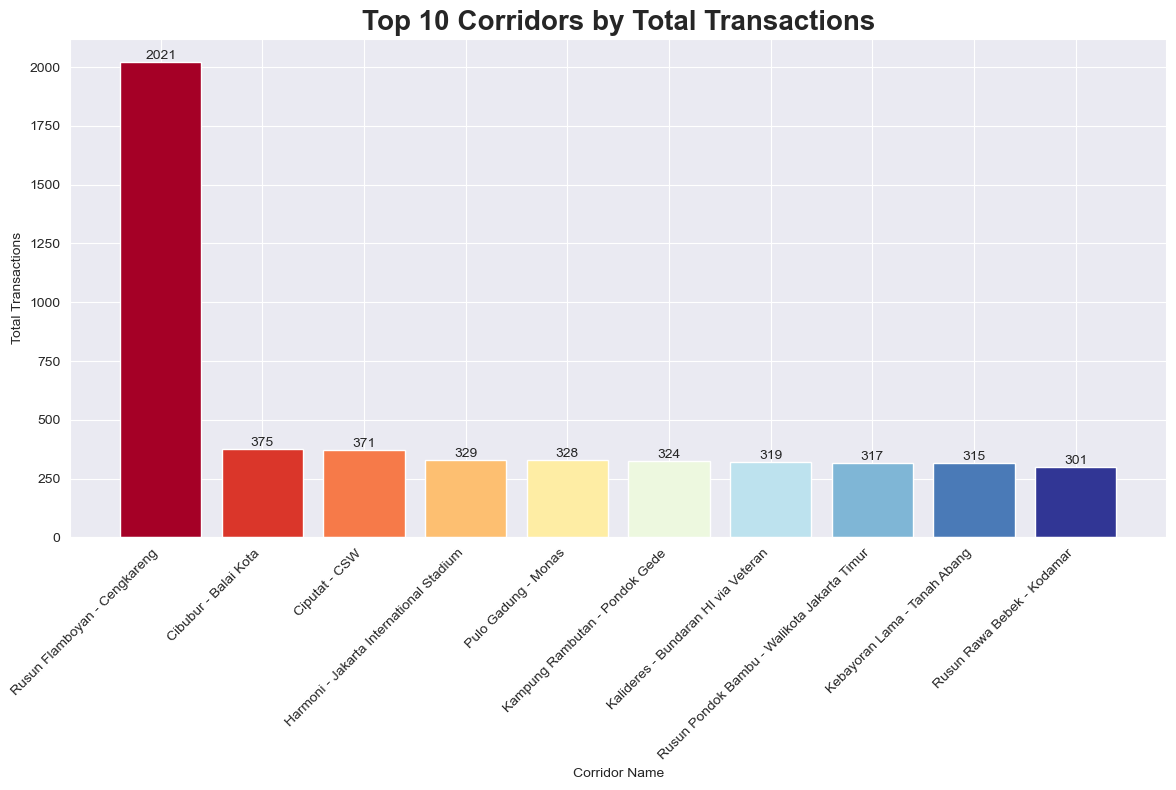

In [178]:
# Plotting

corridor_totals = active_corridor.groupby('corridorName')['Total_Trx'].sum().reset_index()
corridor_totals_sorted = corridor_totals.sort_values(by='Total_Trx', ascending=False)
top_10_corridors = corridor_totals_sorted.head(10)

plt.figure(figsize=(12, 8))

# Custom color palette for bars
colors = cm.RdYlBu(np.linspace(0, 1, len(top_10_corridors['corridorName'])))
bars = plt.bar(top_10_corridors['corridorName'], top_10_corridors['Total_Trx'], color=colors)

# Adding labels for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center')

plt.xlabel('Corridor Name')
plt.ylabel('Total Transactions')
plt.title('Top 10 Corridors by Total Transactions', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

From the 216 corridors, we may know which corridors have the most total transactions happened in April 2023. The "Rusun Flamboyan - Cengkareng" seems dominated with highest number of transactions, 2021 transactions. The others corridors are much lower but have the similar transactions between each other.

**b. Based on Day Active**

In [181]:
# Group by 'day' and aggregate 'corridorName' and count of occurrences
result = active_corridor.groupby('day').apply(lambda x: pd.Series({
    'corridor_count': len(x),
    'corridor_names': ', '.join(x['corridorName']),
})).reset_index()

# Rename the index column
result.rename(columns={'day': 'Day'}, inplace=True)
result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
corridor_count,13,7,212,210,210,210,210,162,174,210,210,209,215,215,191,205,215,215,215,211,210,169,166,210,210,210,212,210,172,179
corridor_names,"Pulo Gebang - Pulo Gadung 2 via PIK, Harmoni -...","Pasar Minggu - Jagakarsa, Ciputat - CSW, Puri ...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Rusun Pondok Bam...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Stasiun Tebet - ...","Rusun Flamboyan - Cengkareng, Rusun Sindang Ko...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Kampung Rambutan...","Rusun Flamboyan - Cengkareng, Ciputat - CSW, P...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Pinang Ranti - B...","Rusun Flamboyan - Cengkareng, Cililitan - Cond...","Rusun Flamboyan - Cengkareng, Ciputat - CSW, C...","Rusun Flamboyan - Cengkareng, Kalideres - Bund...","Rusun Flamboyan - Cengkareng, Kalideres - Bund...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Kampung Melayu -...","Rusun Flamboyan - Cengkareng, Rusun Marunda - ...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Cibubur - Balai ...","Rusun Flamboyan - Cengkareng, Ciputat - CSW, C...","Rusun Flamboyan - Cengkareng, Poris Plawad - B...","Rusun Flamboyan - Cengkareng, Kp. Rambutan - K..."


In [182]:
# Concatenate all corridor names from the 'top_corridor_names' column
all_corridor_names = ', '.join(result['corridor_names'])

# Split the concatenated string by comma to get a list of all corridor names
corridor_names_list = all_corridor_names.split(', ')

# Count occurrences of each corridor name
corridor_counts = pd.Series(corridor_names_list).value_counts().reset_index().rename(columns={0 : "Total Days", "index" : "Corridor Name"})
corridor_counts

,Corridor Name,Total Days
0,Harmoni - Jakarta International Stadium,29
1,Rusun Flamboyan - Cengkareng,29
2,Rawamangun - Klender,29
3,Ciputat - CSW,29
4,Pasar Minggu - Jagakarsa,29
5,Ragunan - MH Thamrin via Semanggi,29
6,Harapan Indah - ASMI,28
7,Terminal Tanah Merah - Pulo Gadung,28
8,Tanjung Priok - Pluit,28
9,Blok M - Pasar Minggu,28


From this data above, 6 data corridor names have 29 days active, they are :  
1. Harmoni - Jakarta International Stadium  
2. Rusun Flamboyan - Cengkareng	 
3. Rawamangun - Klender  
4. Ciputat - CSW  
5. Pasar Minggu - Jagakarsa  
6. Ragunan - MH Thamrin via Semanggi	

The data above showed the top corridors based on total transactions and day active. The most crowded corridor is **Rusun Flamboyan - Cengkareng** with 2021 total transactions in 29 active days.

### 4. Rusun Flamboyan - Cengkareng

**a. Daily Transaction in Rusun Flamboyan - Cengkareng**

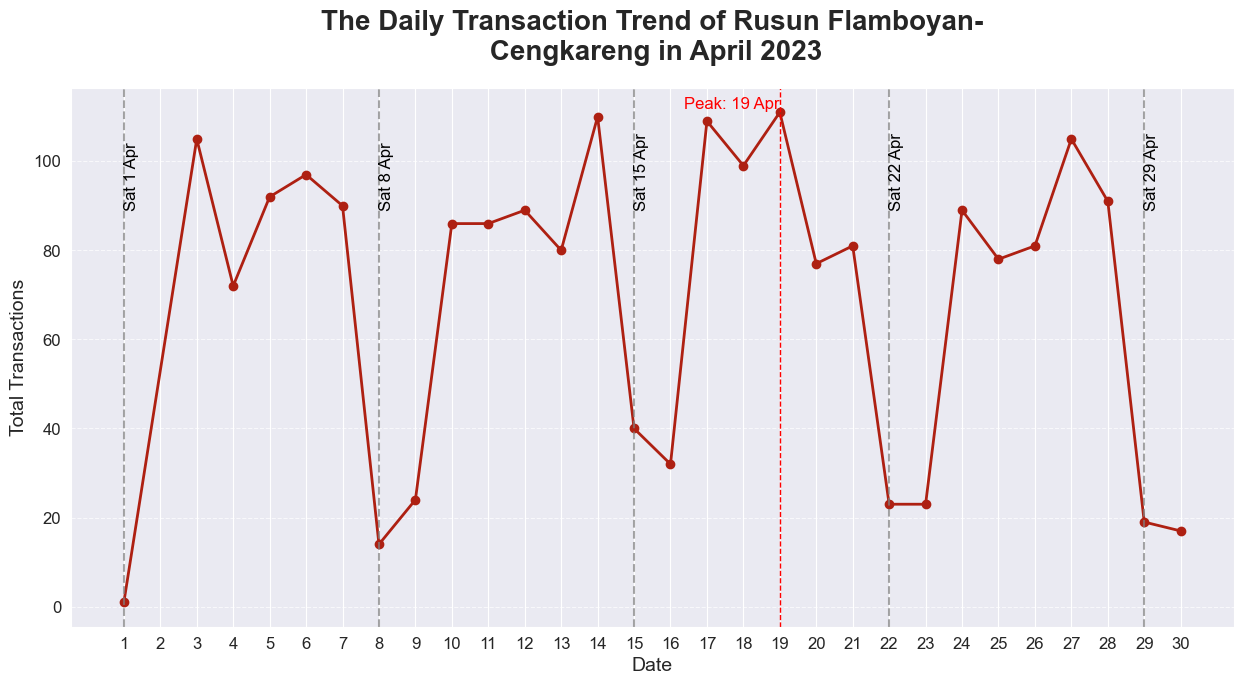

In [184]:
specific_corridor = 'Rusun Flamboyan - Cengkareng'
flamboyan_trend = trend[trend['corridorName'] == specific_corridor]

# Group by date and count transactions for the specific corridor
daily_trend = flamboyan_trend.groupby('day')['transID'].count()

# Set plot style
sns.set_style('darkgrid')

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(daily_trend, color='#ae2012', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.xticks(ticks=np.arange(1, 31), fontsize=12)
plt.yticks(fontsize=12)
plt.title("The Daily Transaction Trend of Rusun Flamboyan-\n Cengkareng in April 2023", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Transactions", fontsize=14)

# Annotate specific days (Saturdays in April 2023)
saturdays = [1, 8, 15, 22, 29]
annotations = ['Sat 1 Apr', 'Sat 8 Apr', 'Sat 15 Apr', 'Sat 22 Apr', 'Sat 29 Apr']
for day, annotation in zip(saturdays, annotations):
    plt.axvline(day, color='gray', linestyle='--', alpha=0.7)
    plt.text(day, daily_trend.max() * 0.80, annotation, rotation=90, color='black', 
             verticalalignment='bottom', fontsize=12)

    
# Highlight the peak day
peak_day = daily_trend.idxmax()
peak_value = daily_trend.max()
plt.axvline(peak_day, color='red', linestyle='--', linewidth=1)
plt.text(peak_day, peak_value, f'Peak: {peak_day} Apr', color='red', 
         verticalalignment='bottom', horizontalalignment='right', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [185]:
peak_days_flamboyan = [3, 14, 17, 19, 27]
peak_day_flamboyan = flamboyan_trend[flamboyan_trend['day'].isin(peak_days_flamboyan)]

# Group by day and count transactions for the specific corridor on peak days
peak_trx_flamboyan = peak_day_flamboyan.groupby('day')['transID'].count().reset_index().rename(columns={"transID": "Total Transaction"})
peak_trx_flamboyan

,day,Total Transaction
0,3,105
1,14,110
2,17,109
3,19,111
4,27,105


**b. Peak Days Transportation in Rusun Flamboyan Cengkareng**

In [186]:
peak_days_flamboyan = [3, 14, 17, 19, 27]
peak_day_flamboyan = flamboyan_trend[flamboyan_trend['day'].isin(peak_days_flamboyan)]

# Group by day and count transactions for the specific corridor on peak days
peak_trx_vhc_flamboyan = peak_day_flamboyan.groupby(['day', 'Vehicle_Type'])['transID'].count().reset_index().rename(columns={"transID": "Total Transaction"})
peak_trx_vhc_flamboyan.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
day,3,3,3,14,14,14,17,17,17,19,19,19,27,27,27
Vehicle_Type,Jak Lingko,Royal Trans,Trans Jakarta,Jak Lingko,Royal Trans,Trans Jakarta,Jak Lingko,Royal Trans,Trans Jakarta,Jak Lingko,Royal Trans,Trans Jakarta,Jak Lingko,Royal Trans,Trans Jakarta
Total Transaction,49,6,50,55,4,51,50,6,53,62,3,46,54,5,46


In [187]:
total_vehicle_type = peak_day_flamboyan['Vehicle_Type'].value_counts()
total_vehicle_type

Jak Lingko       270
Trans Jakarta    246
Royal Trans       24
Name: Vehicle_Type, dtype: int64

The total transportations we need in peak days for Rusun Flamboyan - Cengkareng is as mentioned before.

In [188]:
peak_days_flamboyan = [3, 14, 17, 19, 27]

# Filter data for "Rusun Flamboyan - Cengkareng"
flamboyan_trend = trend[trend['corridorName'] == 'Rusun Flamboyan - Cengkareng']
peak_day_flamboyan = flamboyan_trend[flamboyan_trend['day'].isin(peak_days_flamboyan)]
peak_day_flamboyan['hour'] = peak_day_flamboyan['tapInTime'].dt.hour

# Group by hour and vehicle type, then count total transactions
total_vehicle_type_hourly = peak_day_flamboyan.groupby(['hour', 'Vehicle_Type'])['transID'].count().reset_index().rename(columns={"transID": "Total Transaction"})
total_vehicle_type_hourly

C:\Users\myasu\AppData\Local\Temp\ipykernel_21724\3534033397.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hour,Vehicle_Type,Total Transaction
0,5,Jak Lingko,18
1,5,Royal Trans,2
2,5,Trans Jakarta,25
3,6,Jak Lingko,54
4,6,Royal Trans,6
5,6,Trans Jakarta,35
6,7,Jak Lingko,23
7,7,Royal Trans,2
8,7,Trans Jakarta,14
9,8,Jak Lingko,18


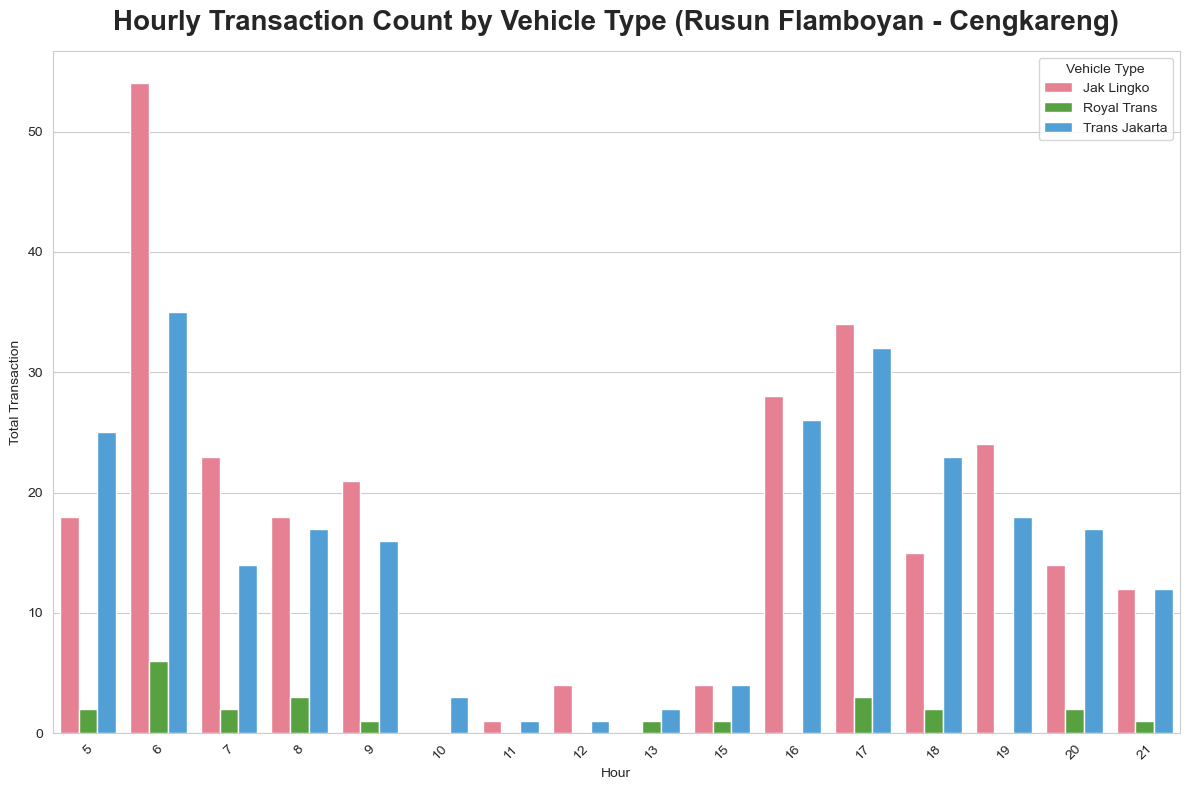

In [193]:
# Plotting 

sns.set_style("whitegrid")
palette = sns.color_palette("husl", 3)  

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='hour', y='Total Transaction', hue='Vehicle_Type', data=total_vehicle_type_hourly, palette=palette)
plt.title('Hourly Transaction Count by Vehicle Type (Rusun Flamboyan - Cengkareng)', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Hour')
plt.ylabel('Total Transaction')
plt.legend(title='Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**c. Forecast Future Demand**

Based on the [official Twitter](https://x.com/PT_Transjakarta/status/1396816204652703745) of TransJakarta, the capacity of Transjakarta is 30 people.  
Based on [this article](https://poskota.co.id/2022/01/29/angkot-ac-mikrotrans-resmi-beroperasi-di-jakarta-begini-spesifikasi-mewahnya), the capacity of Jak Lingko is 11 people at max.  
Based on [this article](https://www.ranselaryani.com/royal-trans-jurusan-bekasi-barat-blok-m-dan-rute-terbaru/), the capacity of Royal Trans is 43 people at max.

In [189]:
# Group by hour and vehicle type, then count total transactions
total_vehicle_type_hourly = peak_day_flamboyan.groupby(['hour', 'Vehicle_Type'])['transID'].count().reset_index().rename(columns={"transID": "Total Transaction"})

# Define vehicle capacities
vehicle_capacities = {
    'Jak Lingko': 11,
    'Trans Jakarta': 30,
    'Royal Trans': 43
}

# Add the 'Vehicle Needed' column
total_vehicle_type_hourly['Vehicle Needed'] = total_vehicle_type_hourly.apply(
    lambda row: int(np.ceil(row['Total Transaction'] / vehicle_capacities.get(row['Vehicle_Type'], 1))), axis=1)

total_vehicle_type_hourly

,hour,Vehicle_Type,Total Transaction,Vehicle Needed
0,5,Jak Lingko,18,2
1,5,Royal Trans,2,1
2,5,Trans Jakarta,25,1
3,6,Jak Lingko,54,5
4,6,Royal Trans,6,1
5,6,Trans Jakarta,35,2
6,7,Jak Lingko,23,3
7,7,Royal Trans,2,1
8,7,Trans Jakarta,14,1
9,8,Jak Lingko,18,2


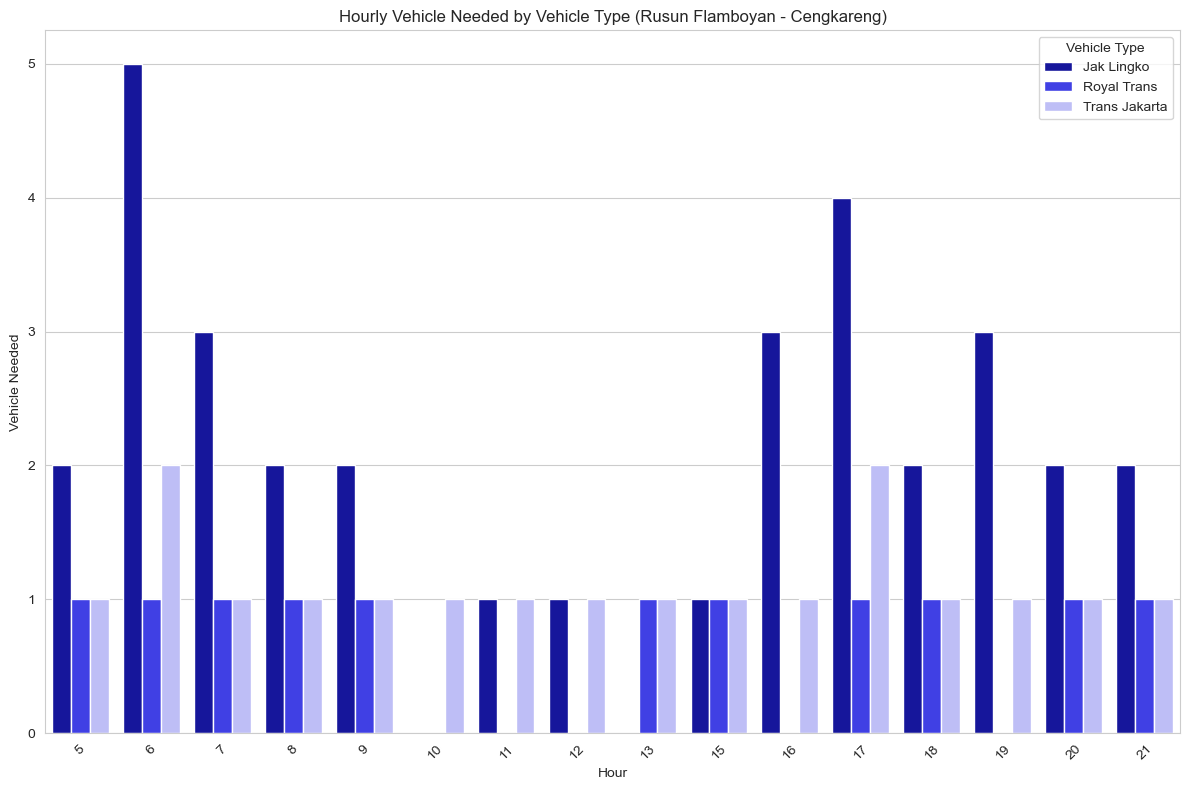

In [197]:
plt.figure(figsize=(12, 8))
palette = sns.color_palette("seismic")

# Plot
sns.barplot(x='hour', y='Vehicle Needed', hue='Vehicle_Type', data=total_vehicle_type_hourly, palette=palette)
plt.title('Hourly Vehicle Needed by Vehicle Type (Rusun Flamboyan - Cengkareng)')
plt.xlabel('Hour')
plt.ylabel('Vehicle Needed')
plt.legend(title='Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [199]:
pivot_table = total_vehicle_type_hourly.pivot_table(index='hour', columns='Vehicle_Type', values='Vehicle Needed', fill_value=0)
pivot_table

Vehicle_Type,Jak Lingko,Royal Trans,Trans Jakarta
hour,,,
5,2,1,1
6,5,1,2
7,3,1,1
8,2,1,1
9,2,1,1
10,0,0,1
11,1,0,1
12,1,0,1
13,0,1,1


# Business Recommendation  

Based on the analysis of the hourly vehicle needed data for the "Rusun Flamboyan - Cengkareng" corridor, we can make the following business recommendations:

### 1. Peak Hours Optimization  
Identify the peak hours when the demand for vehicles is high. During these hours, ensure that there are enough vehicles available to meet the demand. Consider deploying additional vehicles or adjusting schedules to accommodate the peak demand.

### 2. Resource Allocation   
Allocate resources efficiently based on the hourly variation in vehicle demand. Prioritize the allocation of vehicles to hours with the highest vehicle needed to ensure optimal utilization of resources.

### 3. Service Improvement  
Monitor the vehicle needed trends over time and identify any patterns or recurring issues. Use this information to improve service quality and ensure that vehicles are available when needed, enhancing customer satisfaction.

### 4. Capacity Planning   
Use the insights from the analysis to inform capacity planning decisions. Consider investing in additional vehicles or adjusting the capacity of existing vehicles to align with the demand fluctuations observed throughout the day.


By implementing these recommendations, the transportation service can improve operational efficiency, enhance customer satisfaction, and optimize resource utilization, ultimately leading to a more sustainable and profitable business model.

==================================================================================================

https://itdp-indonesia.org/multimedia/20-tahun-transjakarta-replikasi-sistem-transjakarta-dengan-integrasi-transportasi-publik-jabodetabek/

https://nasional.tempo.co/read/1680701/19-tahun-perjalanan-transjakarta-yang-menginspirasi  

https://www.kompas.id/baca/metro/2024/01/15/transjakarta-di-usia-ke-20?status=sukses_login&status_login=login&loc=hard_paywall